In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import theano 
import theano.tensor as tt
import arviz as az
from pprint import pprint
from scipy import stats
import pandas as pd
import matplotlib.cm as cm

# Produce simulated data

In [35]:
from examples import create_sample_data

In [36]:
sample_data = create_sample_data()

In [5]:
sample_data

{'sigma': 2,
 'a_0': 0,
 'a_1': 1,
 'z': 0,
 'a': array([[5. , 6.1, 4.1],
        [3. , 2. , 1. ],
        [2. , 4. , 5. ],
        [5. , 6. , 4. ]]),
 'category_i': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 'mu_i': array([5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. ,
        5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. ,
        5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. ,
        5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 6.1, 6.1,
        6.1, 6.1, 6.1, 6.1,

In [37]:
L = sample_data['a']
category_i = sample_data['category_i']
outcome_i = sample_data['outcome_i']

In [38]:
df = pd.DataFrame({'cat':category_i,'outcome':outcome_i})

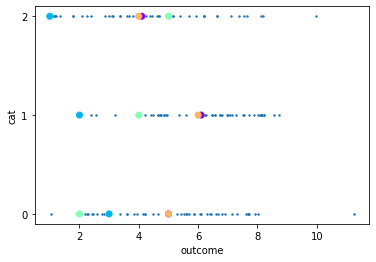

In [39]:
fig, ax = plt.subplots()

df.plot(
    kind='scatter',
    x='outcome',
    y='cat',
    yticks=np.arange(3),
    s=2,
    ax=ax
)

color=cm.rainbow(np.linspace(0,1,len(L)+1))

for i, LoT_costs in enumerate(L):
    ax.scatter(
        x=LoT_costs,
        y=np.arange(len(LoT_costs)),
        c=[color[i]]*len(LoT_costs),
    )

# Bayesian model tests

In [44]:
from importlib import reload

In [42]:
import model_fitting

In [48]:
reload(model_fitting)

<module 'model_fitting' from 'C:\\Users\\faust\\Dropbox\\Amsterdam\\neuralNetsLoT\\NeuralNetworksLoT\\bayesianModel\\model_fitting.py'>

In [50]:
from model_fitting import define_model, sample_smc

In [ ]:
pm.sample_smc(cores)

In [51]:
models, traces = [], []
for LoT in L:
    print(LoT)
    model = define_model(LoT, category_i, outcome_i)
    models.append(model)
    trace = sample_smc(model, filename=None)
    traces.append(trace)

Initializing SMC sampler...
Sampling 4 chains in 4 jobs


[5.  6.1 4.1]


Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.011
Stage:   3 Beta: 0.018
Stage:   4 Beta: 0.028
Stage:   5 Beta: 0.042
Stage:   6 Beta: 0.061
Stage:   7 Beta: 0.094
Stage:   8 Beta: 0.161
Stage:   9 Beta: 0.317
Stage:  10 Beta: 0.751
Stage:  11 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.011
Stage:   3 Beta: 0.018
Stage:   4 Beta: 0.028
Stage:   5 Beta: 0.043
Stage:   6 Beta: 0.065
Stage:   7 Beta: 0.098
Stage:   8 Beta: 0.155
Stage:   9 Beta: 0.272
Stage:  10 Beta: 0.565
Stage:  11 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.011
Stage:   3 Beta: 0.019
Stage:   4 Beta: 0.030
Stage:   5 Beta: 0.045
Stage:   6 Beta: 0.066
Stage:   7 Beta: 0.097
Stage:   8 Beta: 0.156
Stage:   9 Beta: 0.286
Stage:  10 Beta: 0.614
Stage:  11 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.012
Stage:   3 Beta: 0.020
Stage:   4 Beta: 0.031
Stage:   5 Beta: 0.044
Stage:   6 Beta: 0.064
Stage:   7 

[3. 2. 1.]


Initializing SMC sampler...
Sampling 4 chains in 4 jobs
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.010
Stage:   2 Beta: 0.016
Stage:   3 Beta: 0.024
Stage:   4 Beta: 0.036
Stage:   5 Beta: 0.055
Stage:   6 Beta: 0.084
Stage:   7 Beta: 0.136
Stage:   8 Beta: 0.232
Stage:   9 Beta: 0.440
Stage:  10 Beta: 0.990
Stage:  11 Beta: 1.000
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.010
Stage:   2 Beta: 0.017
Stage:   3 Beta: 0.026
Stage:   4 Beta: 0.039
Stage:   5 Beta: 0.057
Stage:   6 Beta: 0.082
Stage:   7 Beta: 0.121
Stage:   8 Beta: 0.204
Stage:   9 Beta: 0.394
Stage:  10 Beta: 0.908
Stage:  11 Beta: 1.000
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.009
Stage:   2 Beta: 0.017
Stage:   3 Beta: 0.027
Stage:   4 Beta: 0.038
Stage:   5 Beta: 0.054
Stage:   6 Beta: 0.079
Stage:   7 Beta: 0.124
Stage:   8 Beta: 0.215
Stage:   9 Beta: 0.452
Stage:  10 Beta: 1.000
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.009
Stage:   2 Beta: 0.016
Stage:   3 Beta: 0.025
Stage:   4 Beta: 0.037
Stage:   5 Beta: 0.056
S

[2. 4. 5.]


Initializing SMC sampler...
Sampling 4 chains in 4 jobs
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.006
Stage:   2 Beta: 0.012
Stage:   3 Beta: 0.018
Stage:   4 Beta: 0.026
Stage:   5 Beta: 0.040
Stage:   6 Beta: 0.063
Stage:   7 Beta: 0.111
Stage:   8 Beta: 0.240
Stage:   9 Beta: 0.578
Stage:  10 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.006
Stage:   2 Beta: 0.013
Stage:   3 Beta: 0.019
Stage:   4 Beta: 0.027
Stage:   5 Beta: 0.041
Stage:   6 Beta: 0.064
Stage:   7 Beta: 0.114
Stage:   8 Beta: 0.239
Stage:   9 Beta: 0.559
Stage:  10 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.007
Stage:   2 Beta: 0.013
Stage:   3 Beta: 0.019
Stage:   4 Beta: 0.028
Stage:   5 Beta: 0.043
Stage:   6 Beta: 0.066
Stage:   7 Beta: 0.117
Stage:   8 Beta: 0.246
Stage:   9 Beta: 0.599
Stage:  10 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.006
Stage:   2 Beta: 0.012
Stage:   3 Beta: 0.019
Stage:   4 Beta: 0.029
Stage:   5 Beta: 0.044
Stage:   6 Beta: 0.067
Stage:   7 Beta: 0.101
S

[5. 6. 4.]


Initializing SMC sampler...
Sampling 4 chains in 4 jobs
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.012
Stage:   3 Beta: 0.020
Stage:   4 Beta: 0.032
Stage:   5 Beta: 0.045
Stage:   6 Beta: 0.062
Stage:   7 Beta: 0.094
Stage:   8 Beta: 0.142
Stage:   9 Beta: 0.244
Stage:  10 Beta: 0.491
Stage:  11 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.011
Stage:   3 Beta: 0.016
Stage:   4 Beta: 0.025
Stage:   5 Beta: 0.038
Stage:   6 Beta: 0.061
Stage:   7 Beta: 0.107
Stage:   8 Beta: 0.225
Stage:   9 Beta: 0.540
Stage:  10 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.011
Stage:   3 Beta: 0.020
Stage:   4 Beta: 0.029
Stage:   5 Beta: 0.040
Stage:   6 Beta: 0.059
Stage:   7 Beta: 0.095
Stage:   8 Beta: 0.165
Stage:   9 Beta: 0.348
Stage:  10 Beta: 0.831
Stage:  11 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.011
Stage:   3 Beta: 0.018
Stage:   4 Beta: 0.028
Stage:   5 Beta: 0.041
S

In [54]:
traces[0].report.__dict__

{'_chain_warnings': {0: [], 1: [], 2: [], 3: []},
 '_global_warnings': [],
 '_ess': None,
 '_rhat': None,
 '_n_tune': 0,
 '_n_draws': 2000,
 '_t_sampling': 211.72634744644165,
 'log_marginal_likelihood': array([-335.63654556, -337.27785541, -337.60622198, -338.37019411]),
 'log_pseudolikelihood': ([], [], [], []),
 'betas': ([0.0006313323974609375,
   0.004833801787754055,
   0.011272669752260434,
   0.018077664012026904,
   0.027815502637944377,
   0.04155302435189973,
   0.06079801721562923,
   0.09384990647908964,
   0.16144470654840412,
   0.31742565490641916,
   0.751214353250858,
   1],
  [0.0006694793701171875,
   0.004940510145388544,
   0.01112027510572311,
   0.018411357166054073,
   0.02841968603534784,
   0.042529048328582425,
   0.06510973740731155,
   0.09832433008029702,
   0.15479193343820327,
   0.271806776038161,
   0.5650426868422327,
   1],
  [0.0006122589111328125,
   0.004830022509850096,
   0.011295541064071754,
   0.01884391499840269,
   0.029968570749144087,
  

In [55]:
logliks = [a.report.log_marginal_likelihood for a in traces]

In [67]:
b = np.exp(np.array(logliks))

In [62]:
marg_liks = b/b.sum()

<BarContainer object of 4 artists>

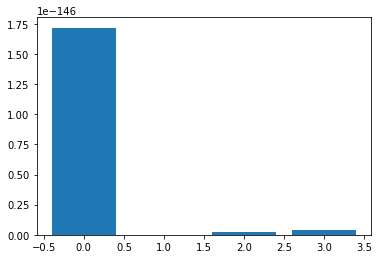

In [73]:
plt.bar(np.arange(4),b[:,0])

# Get an overview of the nets learning

In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
db_path = '/Users/faust/Desktop/neuralNetsLoT/reps-25_batch_size-8_num_epochs-400.db'

In [3]:
con = sql.connect(db_path)
cur = con.cursor()

Get the names of the tables

In [4]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('data',), ('status',)]


Get the column names

In [5]:
instruction = 'PRAGMA table_info("data")'
cur.execute(instruction)
rows = cur.fetchall()

Number of rows:

In [ ]:
res = cur.execute('SELECT COUNT(*) FROM data')

In [12]:
print(list(res))

[(659380000,)]


## Plot learning curves

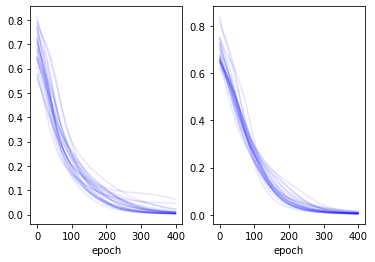

In [106]:
fig, axes = plt.subplots(1,2)
for i, (cat, df) in enumerate(cats_dfs.items()):
    df_cleaned = (
        df.groupby(
            [c for c in df.columns if c != 'batch' and c != 'loss'],
    #         as_index=True
        )
        .mean()
        .drop(columns='batch')
        .unstack()
        ['loss']
        .T
    )

    df_cleaned.plot(
        legend=False, 
        alpha=0.1, 
        color='blue',
        ax=axes[i]
    )

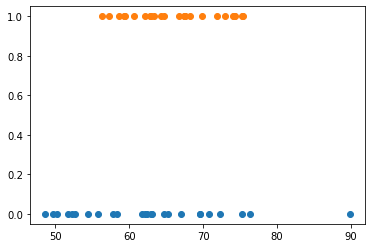

In [121]:
df = cats_dfs[100]
for i, df in enumerate(cats_dfs.values()):
    df_cleaned = (
        df.groupby(
            [c for c in df.columns if c != 'batch' and c != 'loss'],
    #         as_index=True
        )
        .mean()
        .drop(columns='batch')
        .unstack()
        ['loss']
        .T
    )
    plt.scatter(df_cleaned.sum(axis=0), [i]*25)

## Get the categories that have been saved

In [127]:
instruction = (
    'SELECT category, count(category) '
    'FROM data '
    'group by category'
)
cur.execute(instruction)
rows = cur.fetchall()

In [130]:
df = pd.DataFrame(rows, columns=['cat', 'n'])

In [154]:
df

cat      n
0          0  20000
1          1  20000
2          2  20000
3          3  20000
4          4  20000
...      ...    ...
32762  32763  20000
32763  32764  20000
32764  32765  20000
32765  32766  20000
32766  32767  20000

[32767 rows x 2 columns]

## Get learning efforts

In [98]:
fpath = '../neuralNetsLearning/learning_costs.pkl'

In [99]:
df_efforts = pd.read_pickle(fpath)

In [100]:
df_efforts

category  rep     effort
0              0    0  35.322017
1              0    1  25.219702
2              0    2  37.827224
3              0    3  41.740061
4              0    4  27.399204
...          ...  ...        ...
819195     32767   20  40.225559
819196     32767   21  44.391734
819197     32767   22  47.234875
819198     32767   23  45.459494
819199     32767   24  44.709722

[819200 rows x 3 columns]

In [112]:
df_efforts.groupby(['category']).mean()['effort'].sort_values()

category
0         31.111135
512       44.161067
8         45.186586
32767     45.705197
4096      46.037679
            ...    
28054    141.717300
27094    142.198161
27026    144.530960
10646    144.681874
27030    158.857266
Name: effort, Length: 32768, dtype: float64

In [108]:
df_efforts

category  rep     effort
0              0    0  35.322017
1              0    1  25.219702
2              0    2  37.827224
3              0    3  41.740061
4              0    4  27.399204
...          ...  ...        ...
819195     32767   20  40.225559
819196     32767   21  44.391734
819197     32767   22  47.234875
819198     32767   23  45.459494
819199     32767   24  44.709722

[819200 rows x 3 columns]

In [101]:
sns.scatterplot(
    x='effort',
    y='category',
    hue='category',
    data=df_efforts,
    s=1,
    legend=False
)

<AxesSubplot:xlabel='effort', ylabel='category'>

Error in callback <function flush_figures at 0x000002638403B3A0> (for post_execute):


KeyboardInterrupt: 

## Check status of individual categories

In [144]:
instruction = (
    'SELECT * FROM status'
#     'WHERE status != "d"'
)
cur.execute(instruction)
rows = cur.fetchall()

In [145]:
print(len(rows))

32768


Check that all categories are done:

In [146]:
for row in rows:
    if row[1] != 'd':
        print(row)

Change the status of category 11778 to 'w' so running the model calculates it automatically

Run this to change a single category back to 'w' (e.g. if it was unfinished, in this case category 11778):
```sql
    UPDATE status 
    SET status="w" 
    WHERE category=11778
```

# Test Bayesian model on fake data

In [27]:
import model_fitting

In [65]:
from importlib import reload

In [82]:
reload(model_fitting)

<module 'model_fitting' from 'C:\\Users\\faust\\Dropbox\\Amsterdam\\neuralNetsLoT\\NeuralNetworksLoT\\bayesianModel\\model_fitting.py'>

In [28]:
LoT_lengths = np.arange(10)
cat_i = np.random.randint(0,10,100)

In [30]:
xs_fake = LoT_lengths[cat_i]

In [31]:
out_i = 30 + 70 * np.random.normal(loc=xs_fake, scale=1)

In [32]:
model = model_fitting.define_model(LoT_lengths, cat_i, out_i)

In [51]:
trace = model_fitting.sample_from_model(model, False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [a_1, a_0, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.


0, dim: obs, 100 =? 100


In [110]:
fit = model_fitting.fit_variational(model)

Finished [100%]: Average Loss = 749.76


In [84]:
fit_samples = fit.sample()

In [203]:
with model:
    trace_smc = pm.sample_smc(
        2000,
        parallel=False
    )

TypeError: sample_smc() got an unexpected keyword argument 'return_inferencedata'

In [114]:
trace_az = az.from_pymc3(trace_smc, model=model)

0, dim: obs, 100 =? 100


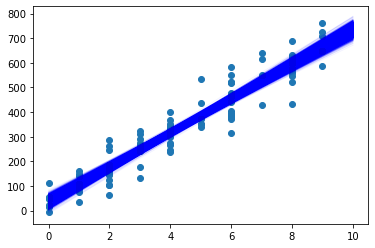

In [115]:
a0_trace = trace_az.posterior['a_0'].values.flatten()
a1_trace = trace_az.posterior['a_1'].values.flatten()
sigma_trace = trace_az.posterior['sigma'].values.flatten()

plt.scatter(xs_fake, out_i)

xs = np.linspace(0,10,2)
for a0,a1,s in zip(a0_trace, a1_trace, sigma_trace):
    plt.plot(
        xs,
        a0+a1*xs,
        color='blue',
        alpha=0.05,
        linewidth=1
    )

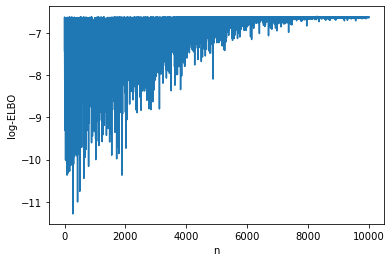

In [79]:
advi_elbo = pd.DataFrame(
    {'log-ELBO': -np.log(fit.hist),
     'n': np.arange(fit.hist.shape[0])})

_ = sns.lineplot(y='log-ELBO', x='n', data=advi_elbo)

# Test Bayesian model with true data

In [4]:
from importlib import reload
reload(model_fitting)

<module 'model_fitting' from 'C:\\Users\\faust\\Dropbox\\Amsterdam\\neuralNetsLoT\\NeuralNetworksLoT\\bayesianModel\\model_fitting.py'>

In [3]:
import model_fitting

In [8]:
L = np.load('../data/lengths_data.npy')

In [9]:
learning_data = pd.read_pickle('../data/learning_costs.pkl')

In [10]:
category_i, _, cost_i = learning_data.values.T

[-1 -1 -1 ... -1 -1 -1]


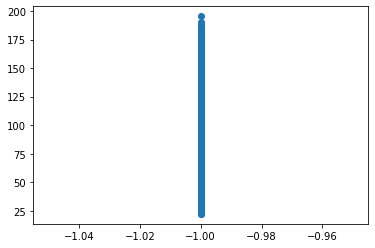

[-1 -1 -1 ... -1 -1 -1]


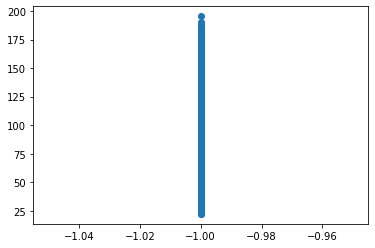

[-1 -1 -1 ... -1 -1 -1]


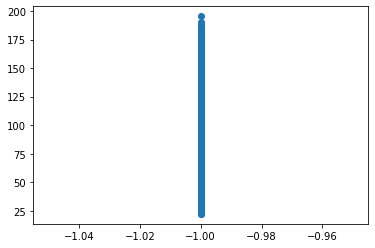

[1 1 1 ... 8 8 8]


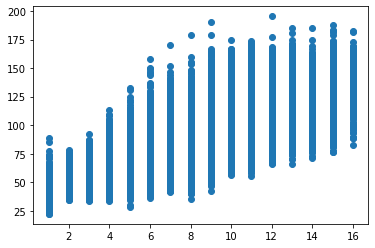

[5 5 5 ... 5 5 5]


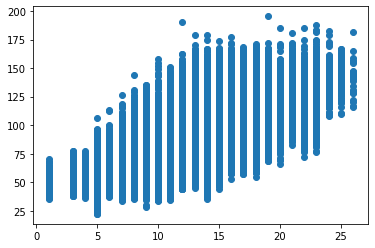

[1 1 1 ... 3 3 3]


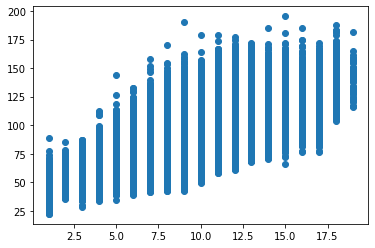

[2 2 2 ... 4 4 4]


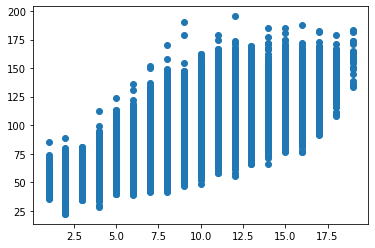

[1 1 1 ... 3 3 3]


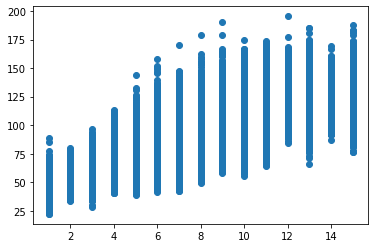

[-1 -1 -1 ... -1 -1 -1]


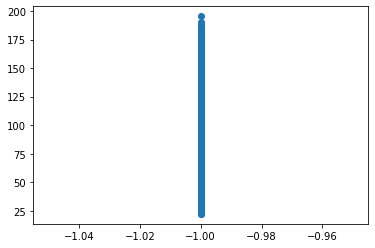

[-1 -1 -1 ... -1 -1 -1]


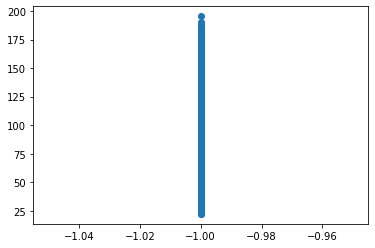

[-1 -1 -1 ... -1 -1 -1]


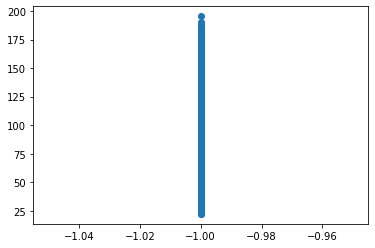

[1 1 1 ... 6 6 6]


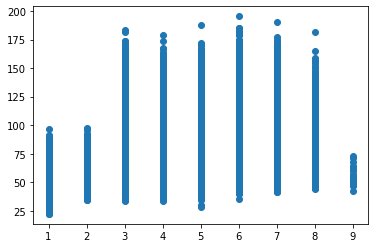

[-1 -1 -1 ... -1 -1 -1]


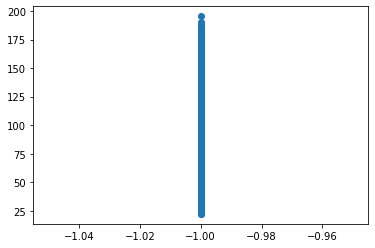

[1 1 1 ... 3 3 3]


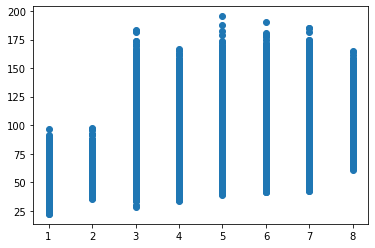

[-1 -1 -1 ... -1 -1 -1]


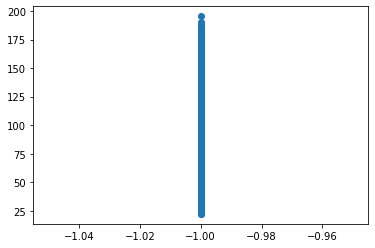

[1 1 1 ... 3 3 3]


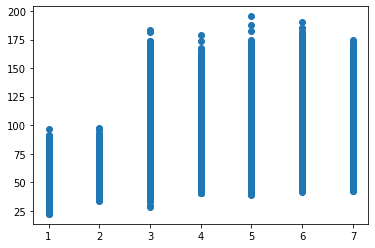

[-1 -1 -1 ... -1 -1 -1]


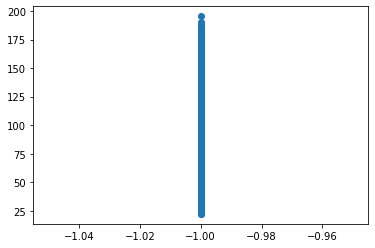

[1 1 1 ... 5 5 5]


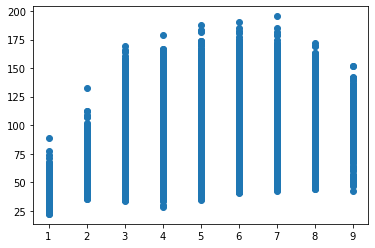

[2 2 2 ... 8 8 8]


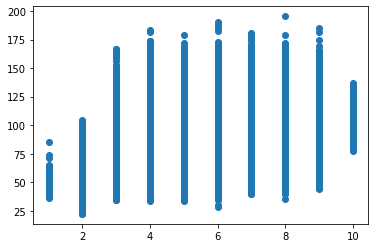

[1 1 1 ... 5 5 5]


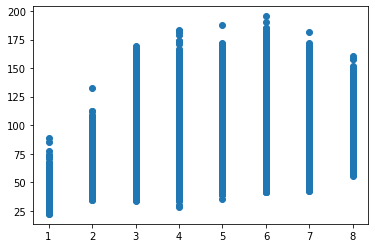

[2 2 2 ... 4 4 4]


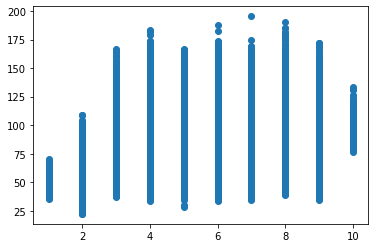

[1 1 1 ... 3 3 3]


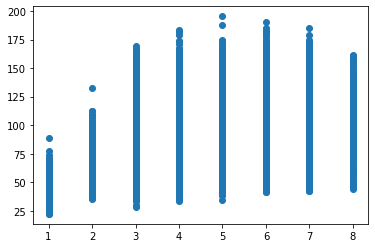

[2 2 2 ... 4 4 4]


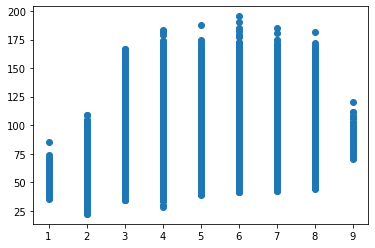

[1 1 1 ... 3 3 3]


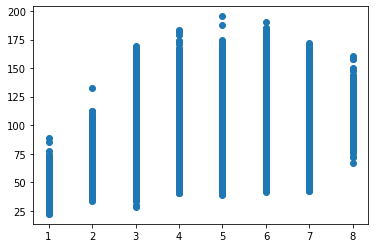

[-1 -1 -1 ... -1 -1 -1]


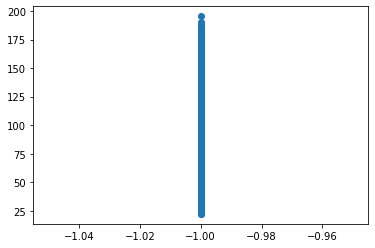

[1 1 1 ... 5 5 5]


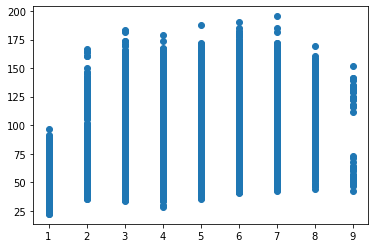

[-1 -1 -1 ... -1 -1 -1]


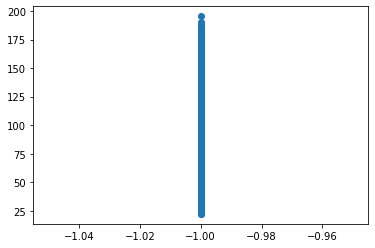

[1 1 1 ... 5 5 5]


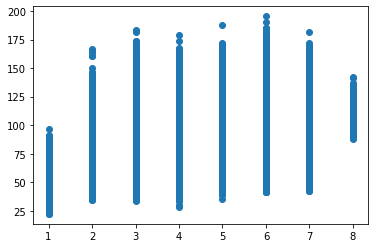

[1 1 1 ... 4 4 4]


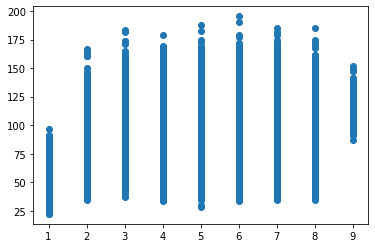

[1 1 1 ... 3 3 3]


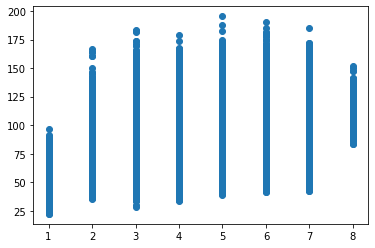

[1 1 1 ... 4 4 4]


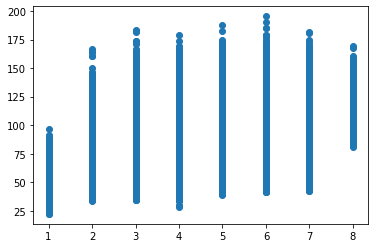

[1 1 1 ... 3 3 3]


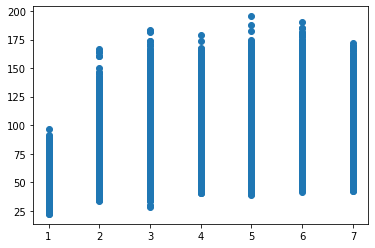

[-1 -1 -1 ... -1 -1 -1]


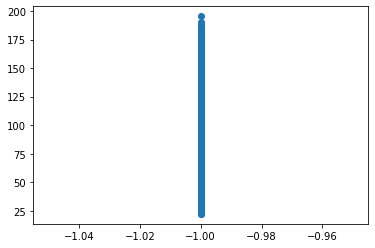

[1 1 1 ... 4 4 4]


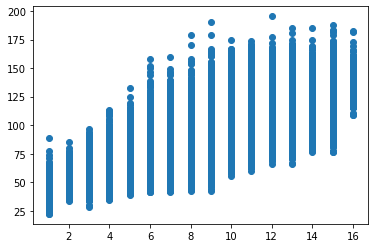

[2 2 2 ... 4 4 4]


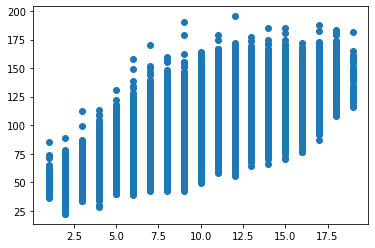

[1 1 1 ... 4 4 4]


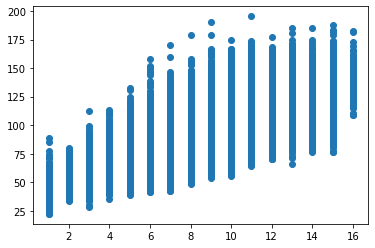

[3 3 3 ... 3 3 3]


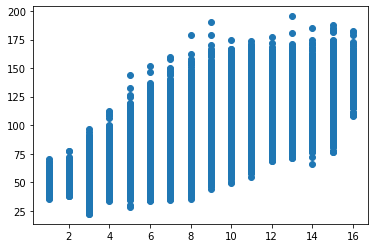

[1 1 1 ... 3 3 3]


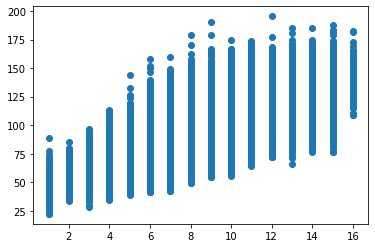

[2 2 2 ... 3 3 3]


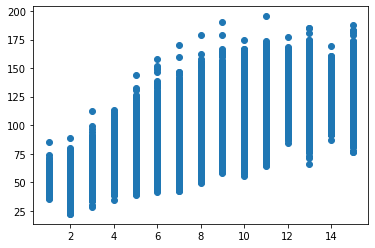

[1 1 1 ... 3 3 3]


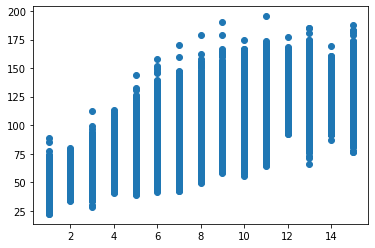

[-1 -1 -1 ... -1 -1 -1]


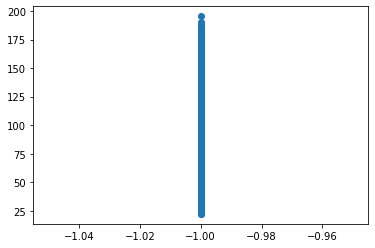

[1 1 1 ... 4 4 4]


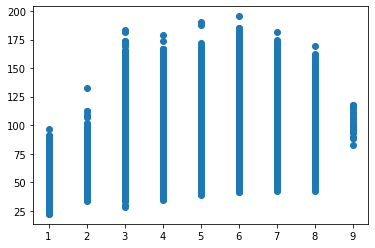

[1 1 1 ... 4 4 4]


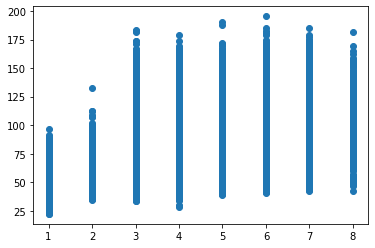

[1 1 1 ... 4 4 4]


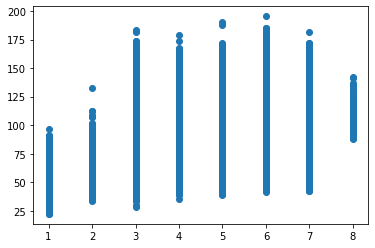

[1 1 1 ... 3 3 3]


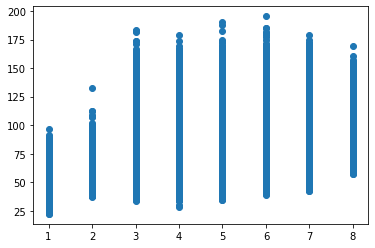

[1 1 1 ... 3 3 3]


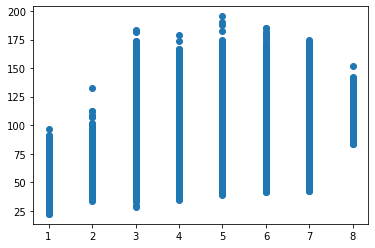

[1 1 1 ... 3 3 3]


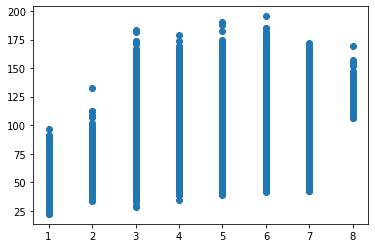

[1 1 1 ... 3 3 3]


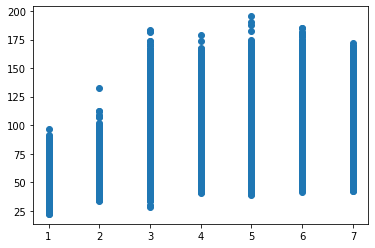

[-1 -1 -1 ... -1 -1 -1]


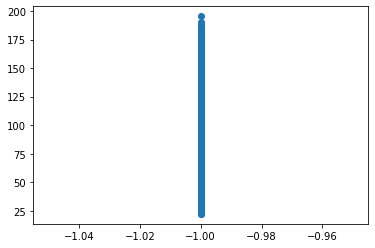

[1 1 1 ... 4 4 4]


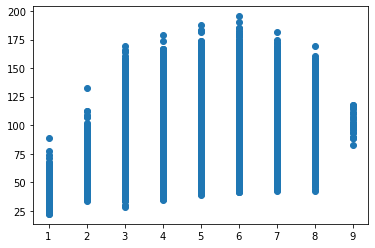

[2 2 2 ... 4 4 4]


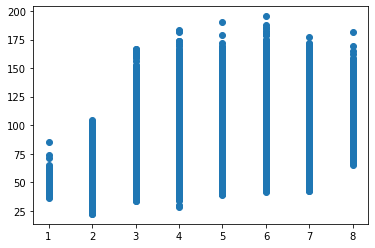

[1 1 1 ... 4 4 4]


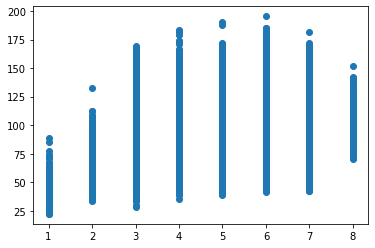

[2 2 2 ... 3 3 3]


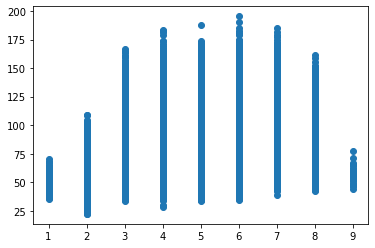

[1 1 1 ... 3 3 3]


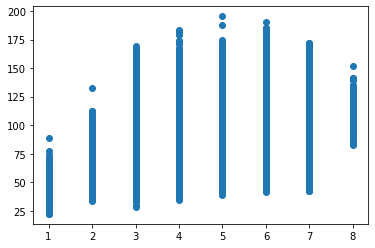

[2 2 2 ... 3 3 3]


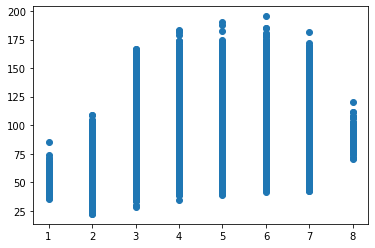

[1 1 1 ... 3 3 3]


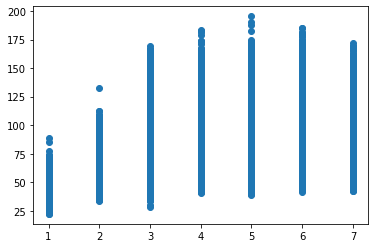

[-1 -1 -1 ... -1 -1 -1]


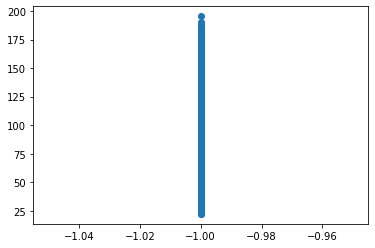

[1 1 1 ... 4 4 4]


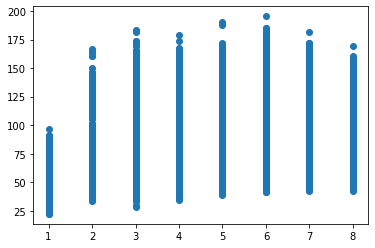

[1 1 1 ... 4 4 4]


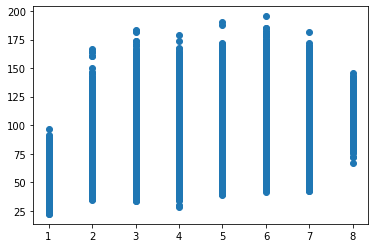

[1 1 1 ... 4 4 4]


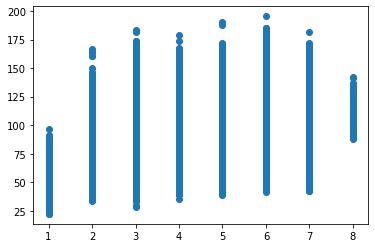

[1 1 1 ... 3 3 3]


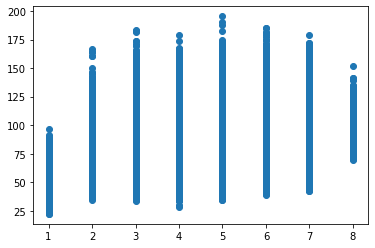

[1 1 1 ... 3 3 3]


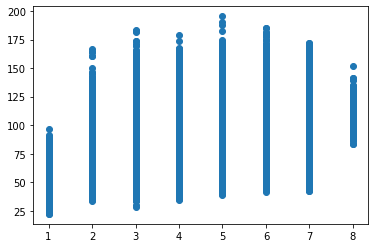

[1 1 1 ... 3 3 3]


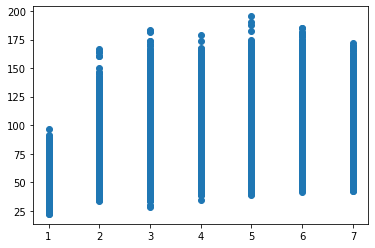

[1 1 1 ... 3 3 3]


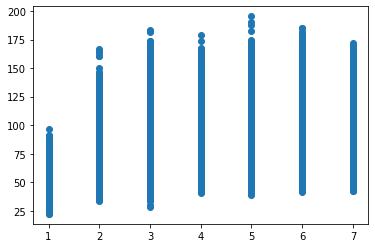

[-1 -1 -1 ... -1 -1 -1]


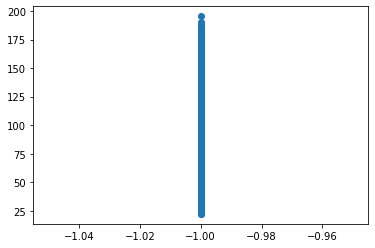

[1 1 1 ... 7 7 7]


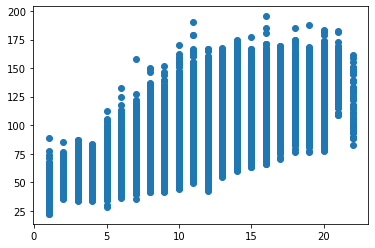

[-1 -1 -1 ... -1 -1 -1]


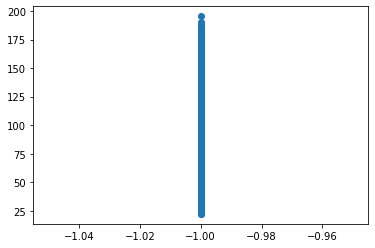

[1 1 1 ... 7 7 7]


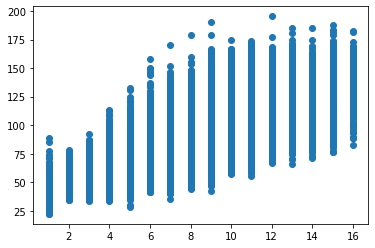

[3 3 3 ... 5 5 5]


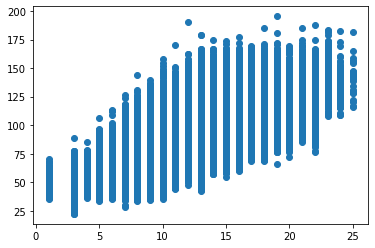

[1 1 1 ... 3 3 3]


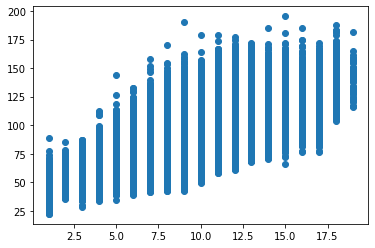

[2 2 2 ... 4 4 4]


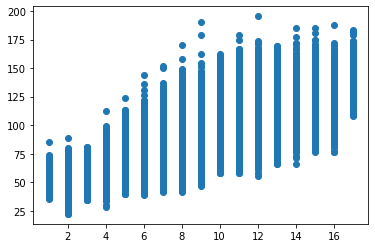

[1 1 1 ... 3 3 3]


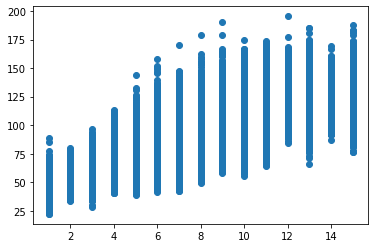

[-1 -1 -1 ... -1 -1 -1]


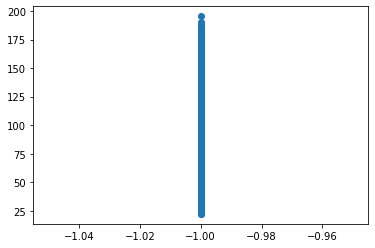

[1 1 1 ... 7 7 7]


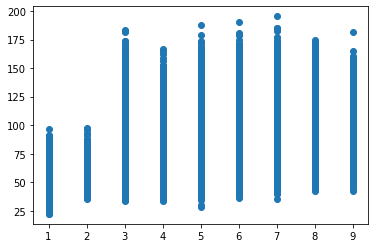

[-1 -1 -1 ... -1 -1 -1]


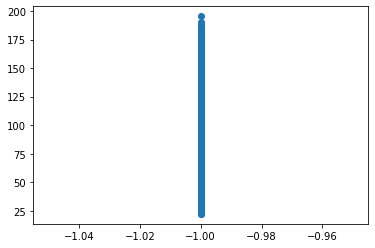

[1 1 1 ... 6 6 6]


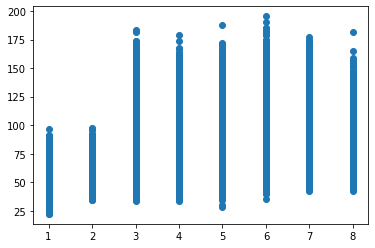

[-1 -1 -1 ... -1 -1 -1]


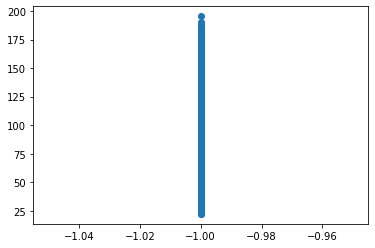

[1 1 1 ... 3 3 3]


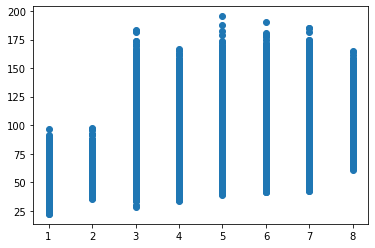

[-1 -1 -1 ... -1 -1 -1]


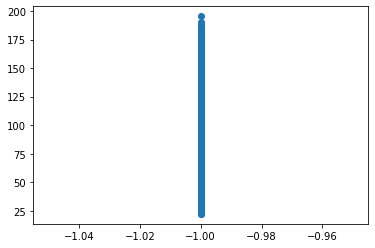

[1 1 1 ... 3 3 3]


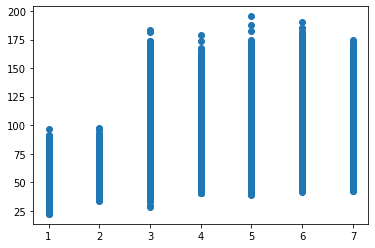

[-1 -1 -1 ... -1 -1 -1]


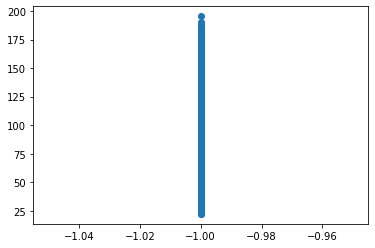

[1 1 1 ... 5 5 5]


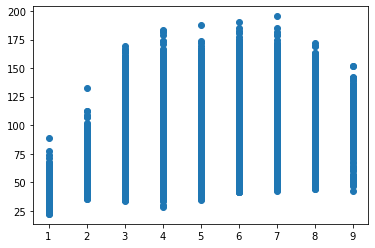

[2 2 2 ... 8 8 8]


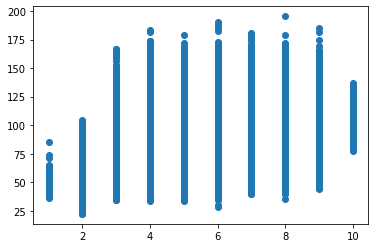

[1 1 1 ... 5 5 5]


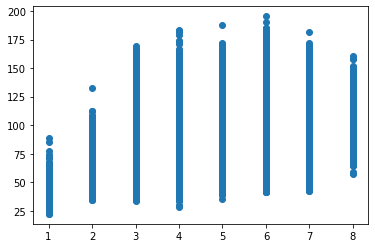

[2 2 2 ... 4 4 4]


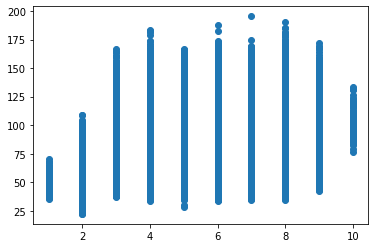

[1 1 1 ... 3 3 3]


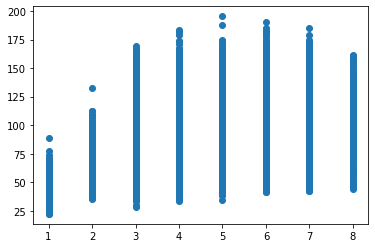

[2 2 2 ... 4 4 4]


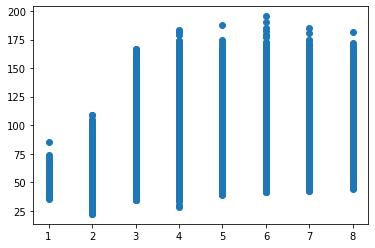

[1 1 1 ... 3 3 3]


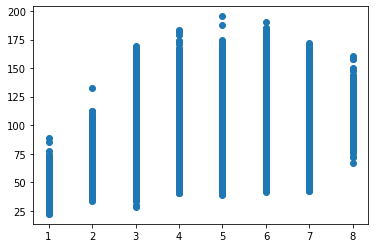

[-1 -1 -1 ... -1 -1 -1]


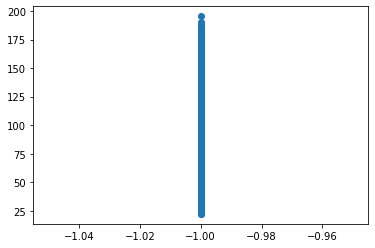

[1 1 1 ... 5 5 5]


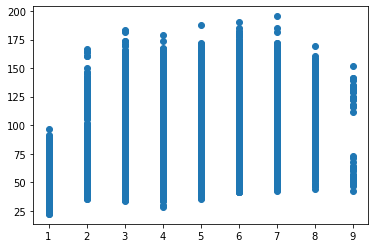

[-1 -1 -1 ... -1 -1 -1]


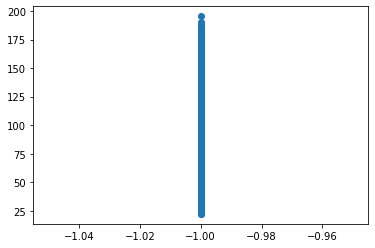

[1 1 1 ... 5 5 5]


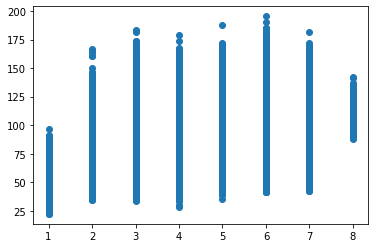

[1 1 1 ... 4 4 4]


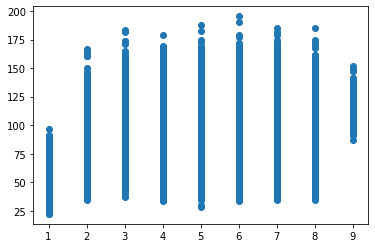

[1 1 1 ... 3 3 3]


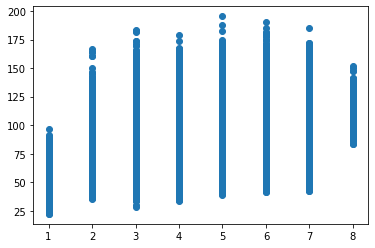

[1 1 1 ... 4 4 4]


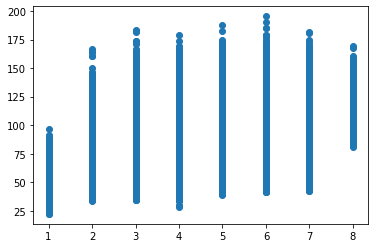

[1 1 1 ... 3 3 3]


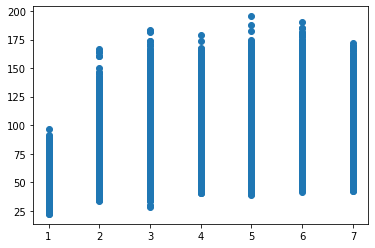

[2 2 2 ... 4 4 4]


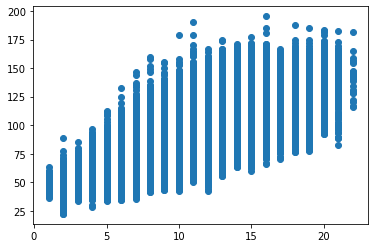

[1 1 1 ... 4 4 4]


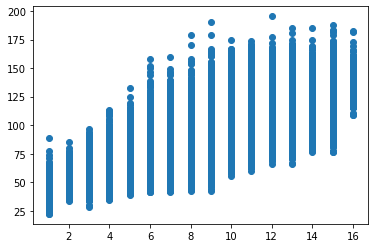

[2 2 2 ... 4 4 4]


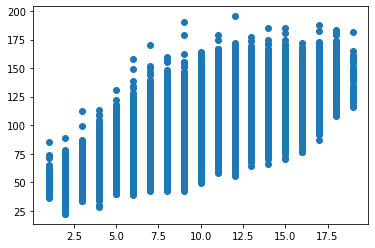

[1 1 1 ... 4 4 4]


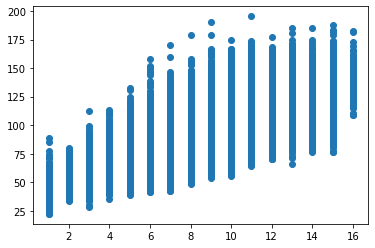

[2 2 2 ... 3 3 3]


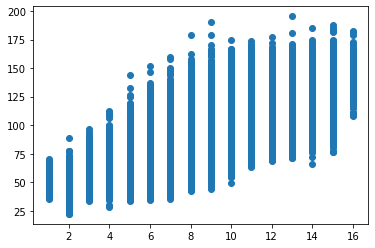

[1 1 1 ... 3 3 3]


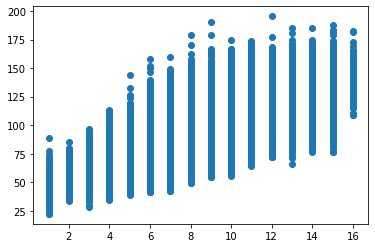

[2 2 2 ... 3 3 3]


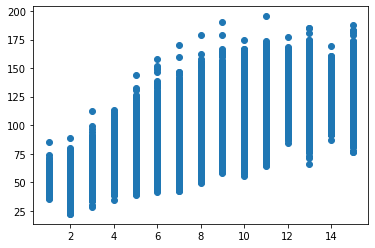

[1 1 1 ... 3 3 3]


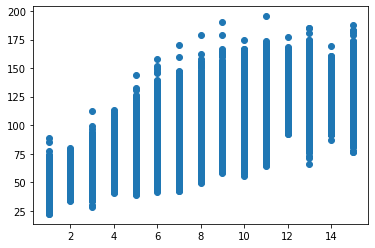

[1 1 1 ... 4 4 4]


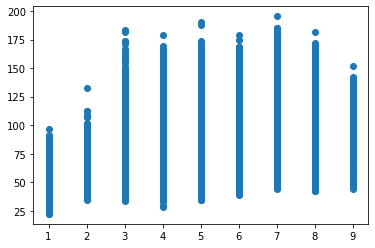

[1 1 1 ... 4 4 4]


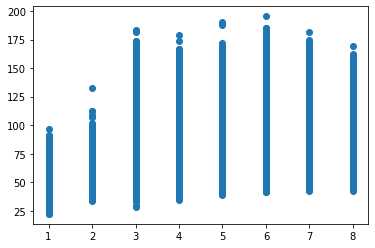

[1 1 1 ... 4 4 4]


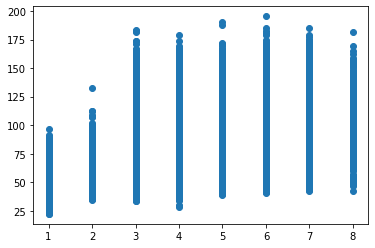

[1 1 1 ... 4 4 4]


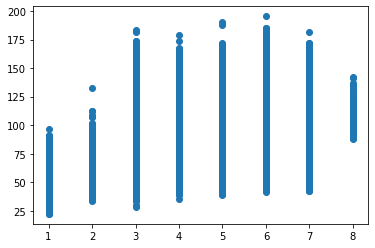

[1 1 1 ... 3 3 3]


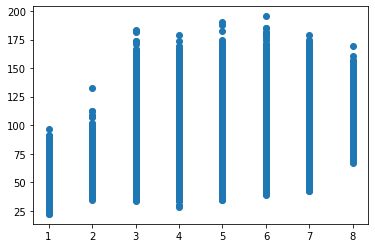

[1 1 1 ... 3 3 3]


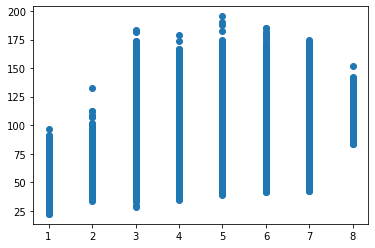

[1 1 1 ... 3 3 3]


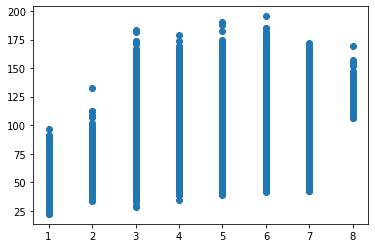

[1 1 1 ... 3 3 3]


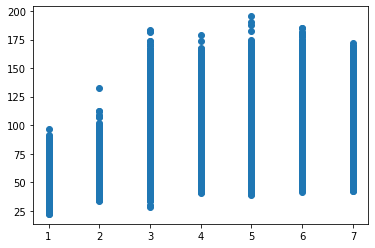

[2 2 2 ... 4 4 4]


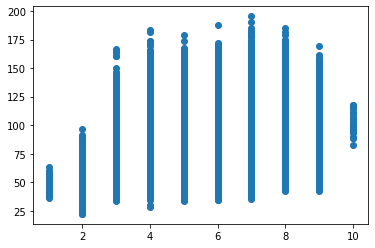

[1 1 1 ... 4 4 4]


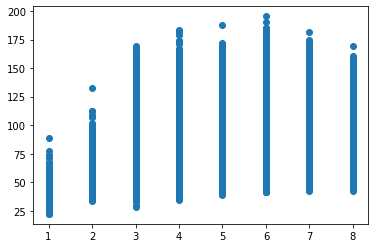

[2 2 2 ... 4 4 4]


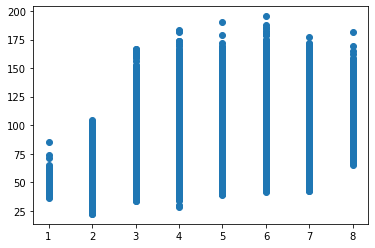

[1 1 1 ... 4 4 4]


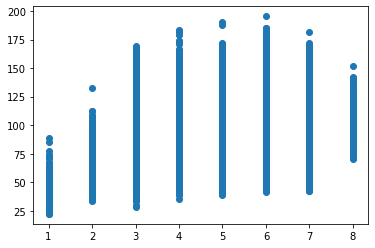

[2 2 2 ... 3 3 3]


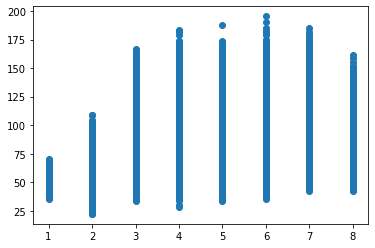

[1 1 1 ... 3 3 3]


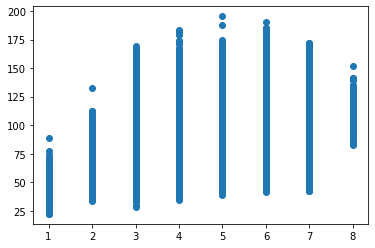

[2 2 2 ... 3 3 3]


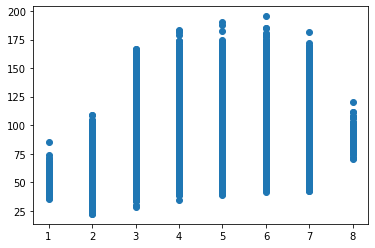

[1 1 1 ... 3 3 3]


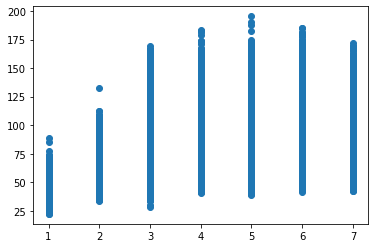

[1 1 1 ... 4 4 4]


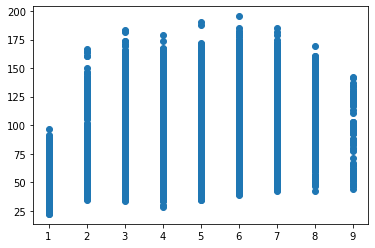

[1 1 1 ... 4 4 4]


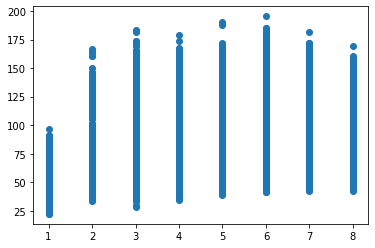

[1 1 1 ... 4 4 4]


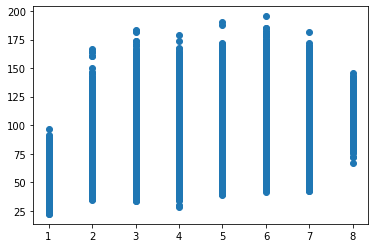

[1 1 1 ... 4 4 4]


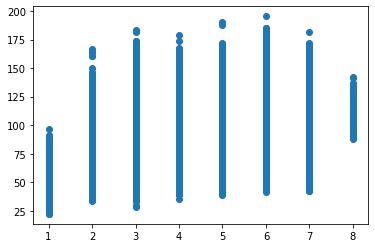

[1 1 1 ... 3 3 3]


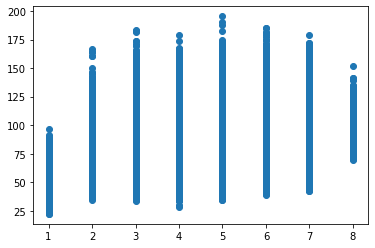

[1 1 1 ... 3 3 3]


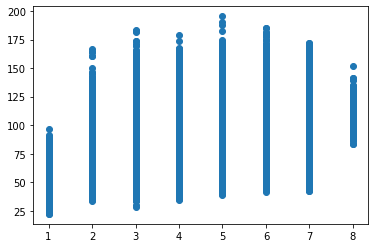

[1 1 1 ... 3 3 3]


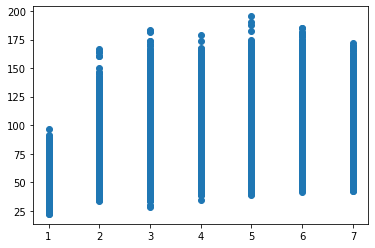

[1 1 1 ... 3 3 3]


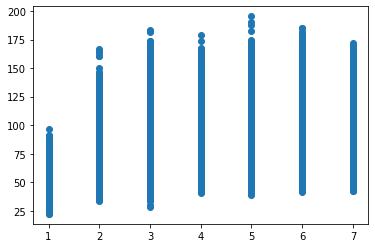

[-1 -1 -1 ... -1 -1 -1]


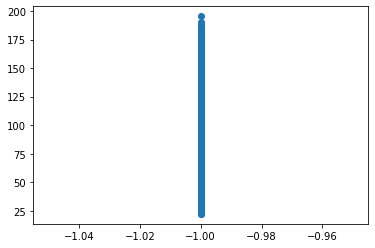

[-1 -1 -1 ... -1 -1 -1]


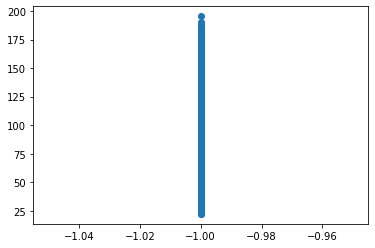

[-1 -1 -1 ... -1 -1 -1]


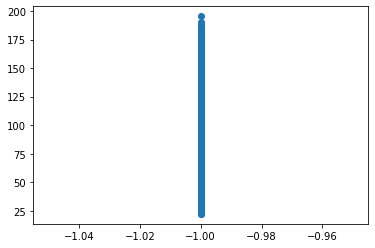

[1 1 1 ... 5 5 5]


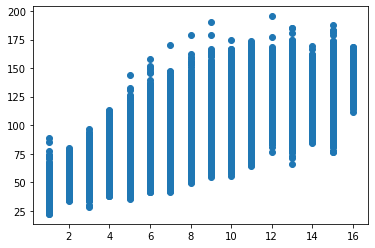

[-1 -1 -1 ... -1 -1 -1]


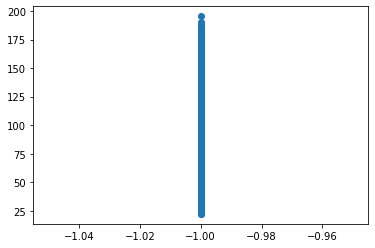

[1 1 1 ... 3 3 3]


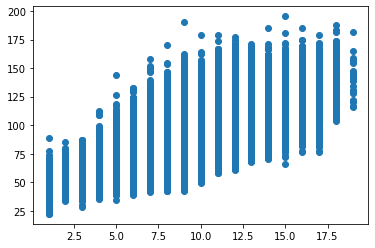

[-1 -1 -1 ... -1 -1 -1]


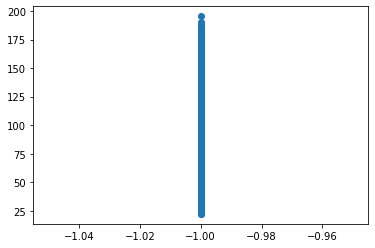

[1 1 1 ... 3 3 3]


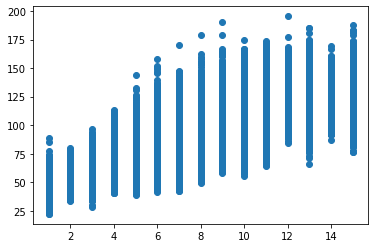

[-1 -1 -1 ... -1 -1 -1]


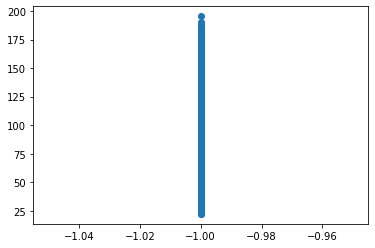

[-1 -1 -1 ... -1 -1 -1]


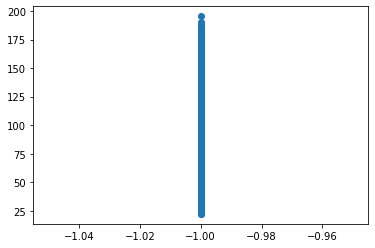

[-1 -1 -1 ... -1 -1 -1]


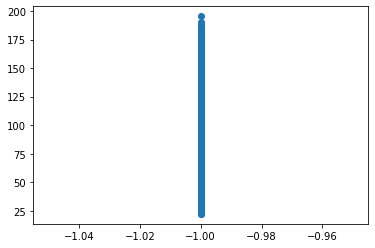

[1 1 1 ... 5 5 5]


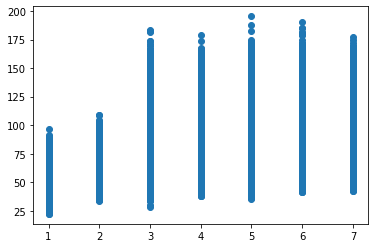

[-1 -1 -1 ... -1 -1 -1]


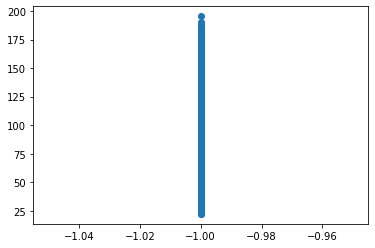

[1 1 1 ... 3 3 3]


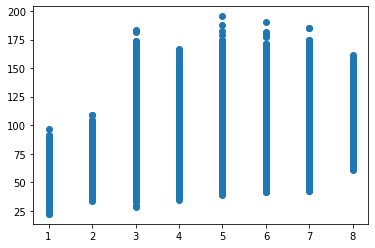

[-1 -1 -1 ... -1 -1 -1]


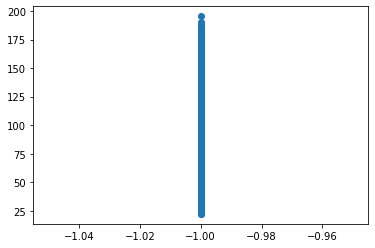

[1 1 1 ... 3 3 3]


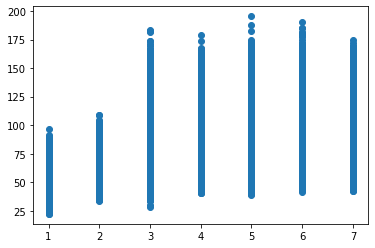

[-1 -1 -1 ... -1 -1 -1]


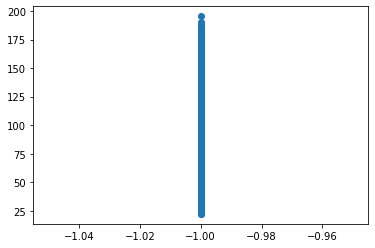

[1 1 1 ... 4 4 4]


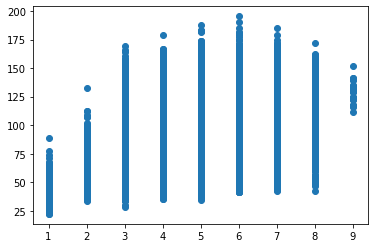

[-1 -1 -1 ... -1 -1 -1]


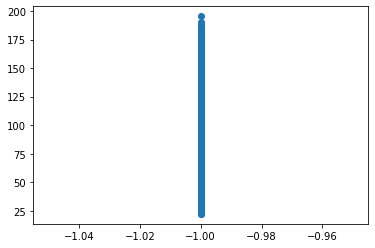

[1 1 1 ... 4 4 4]


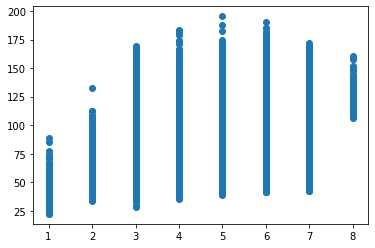

[-1 -1 -1 ... -1 -1 -1]


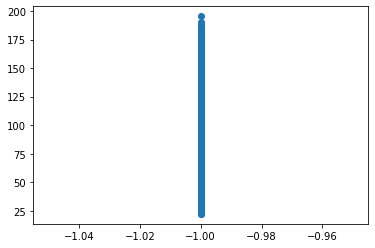

[1 1 1 ... 3 3 3]


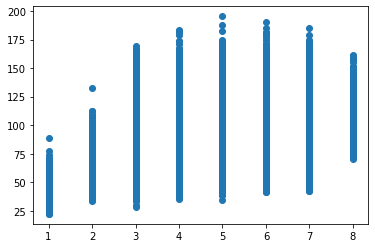

[-1 -1 -1 ... -1 -1 -1]


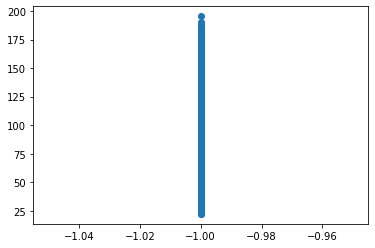

[1 1 1 ... 3 3 3]


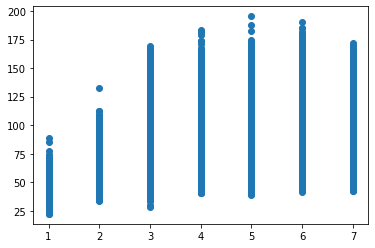

[-1 -1 -1 ... -1 -1 -1]


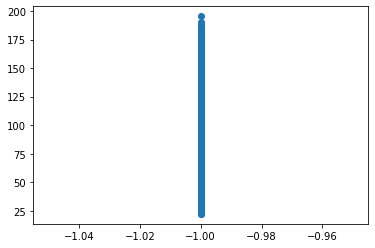

[1 1 1 ... 4 4 4]


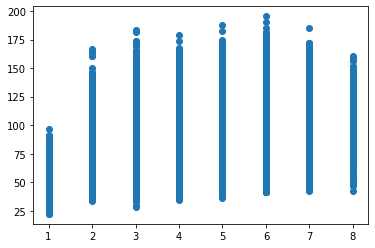

[-1 -1 -1 ... -1 -1 -1]


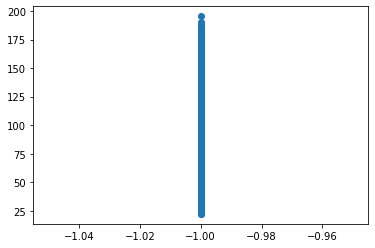

[1 1 1 ... 4 4 4]


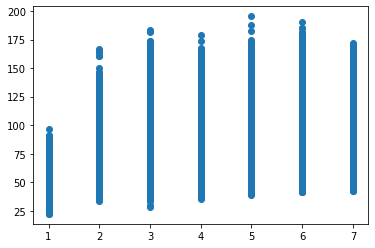

[-1 -1 -1 ... -1 -1 -1]


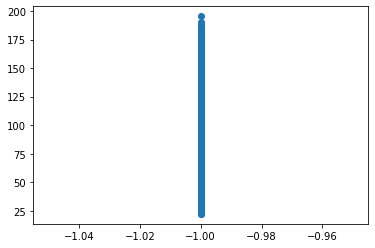

[1 1 1 ... 3 3 3]


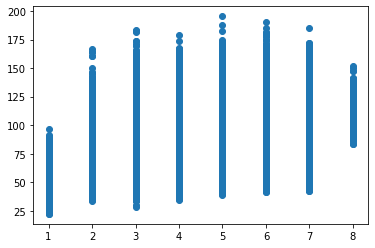

[-1 -1 -1 ... -1 -1 -1]


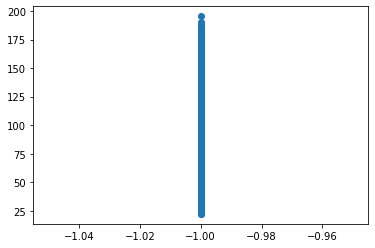

[1 1 1 ... 3 3 3]


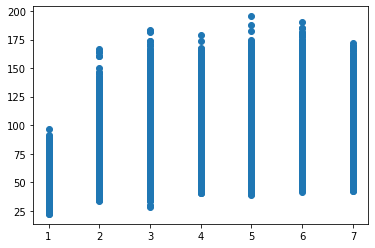

[-1 -1 -1 ... -1 -1 -1]


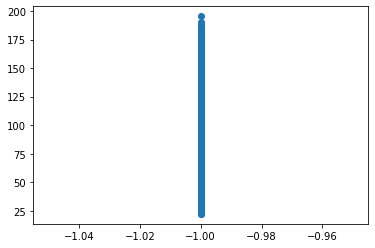

[1 1 1 ... 4 4 4]


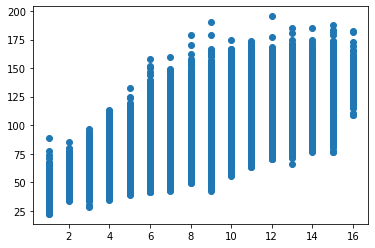

[2 2 2 ... 4 4 4]


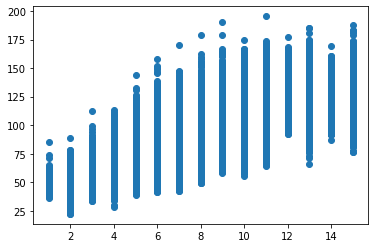

[1 1 1 ... 4 4 4]


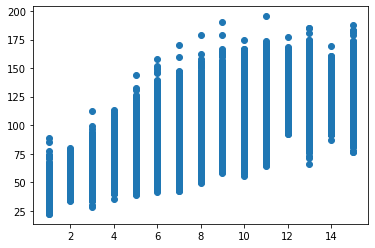

[2 2 2 ... 3 3 3]


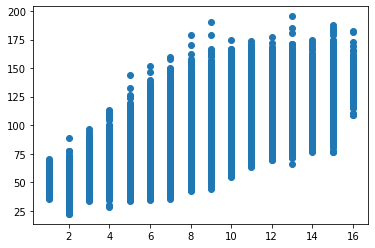

[1 1 1 ... 3 3 3]


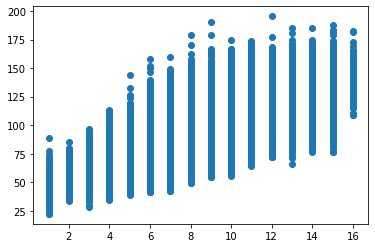

[2 2 2 ... 3 3 3]


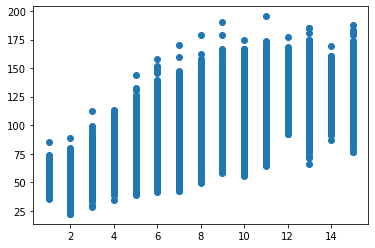

[1 1 1 ... 3 3 3]


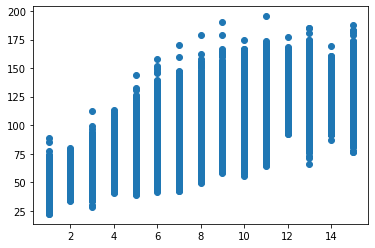

[-1 -1 -1 ... -1 -1 -1]


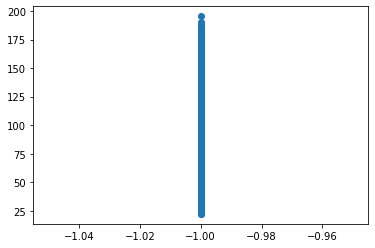

[1 1 1 ... 4 4 4]


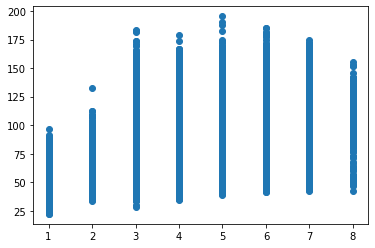

[1 1 1 ... 4 4 4]


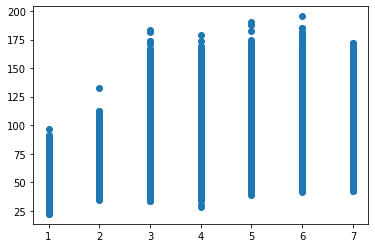

[1 1 1 ... 4 4 4]


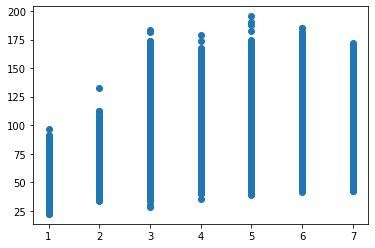

[1 1 1 ... 3 3 3]


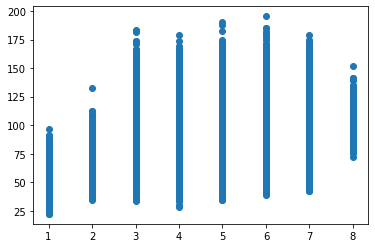

[1 1 1 ... 3 3 3]


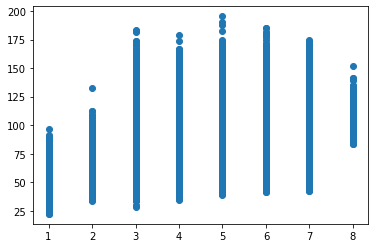

[1 1 1 ... 3 3 3]


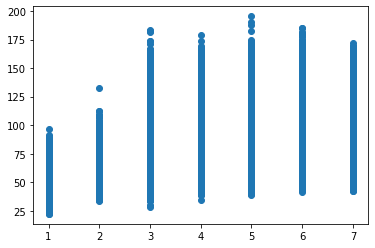

[1 1 1 ... 3 3 3]


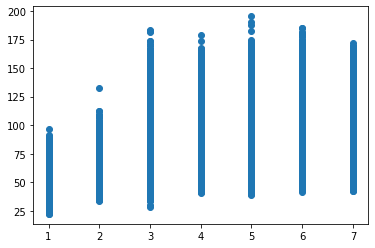

[-1 -1 -1 ... -1 -1 -1]


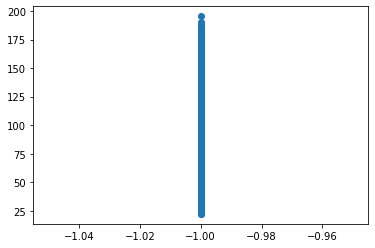

[1 1 1 ... 4 4 4]


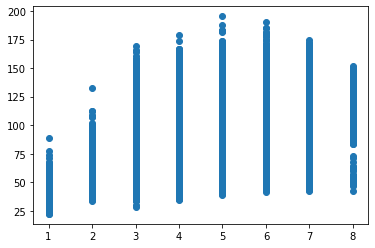

[2 2 2 ... 4 4 4]


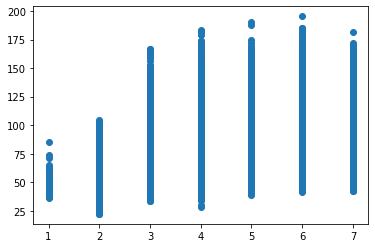

[1 1 1 ... 4 4 4]


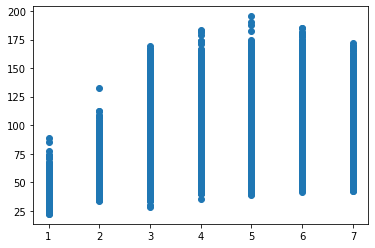

[2 2 2 ... 3 3 3]


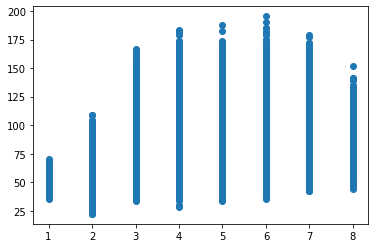

[1 1 1 ... 3 3 3]


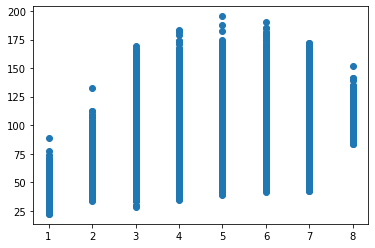

[2 2 2 ... 3 3 3]


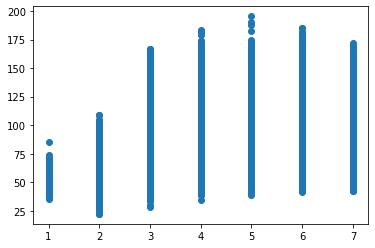

[1 1 1 ... 3 3 3]


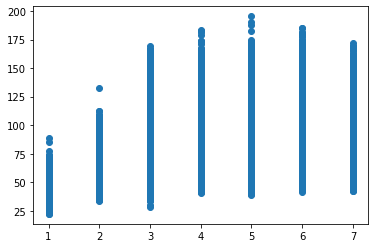

[-1 -1 -1 ... -1 -1 -1]


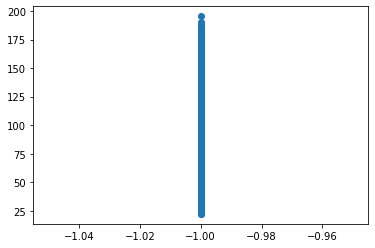

[1 1 1 ... 4 4 4]


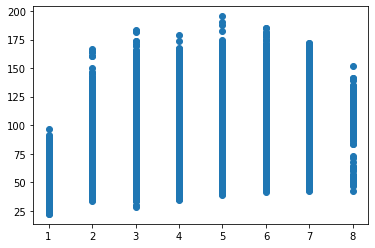

[1 1 1 ... 4 4 4]


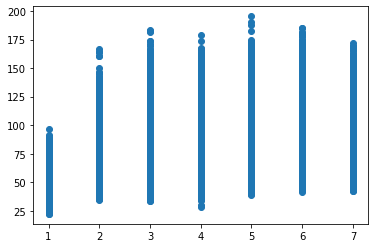

[1 1 1 ... 4 4 4]


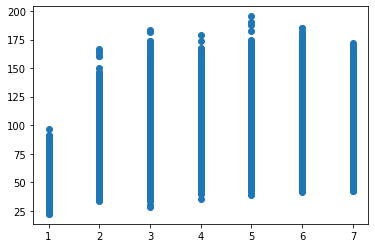

[1 1 1 ... 3 3 3]


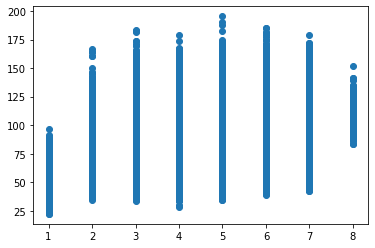

[1 1 1 ... 3 3 3]


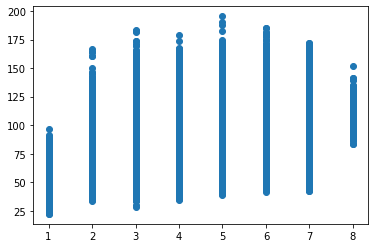

[1 1 1 ... 3 3 3]


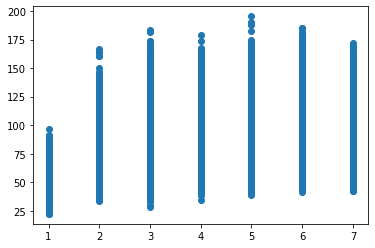

[1 1 1 ... 3 3 3]


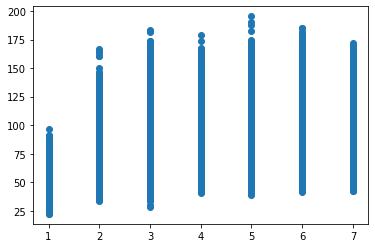

[-1 -1 -1 ... -1 -1 -1]


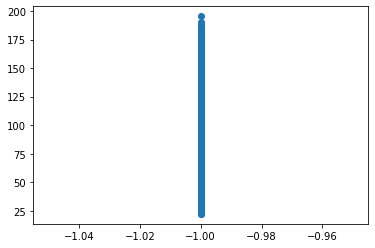

[1 1 1 ... 4 4 4]


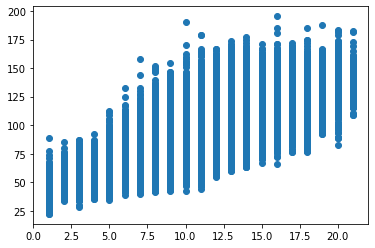

[-1 -1 -1 ... -1 -1 -1]


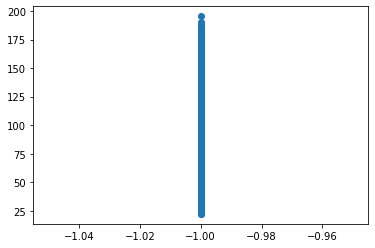

[1 1 1 ... 4 4 4]


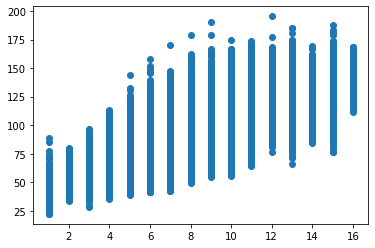

[-1 -1 -1 ... -1 -1 -1]


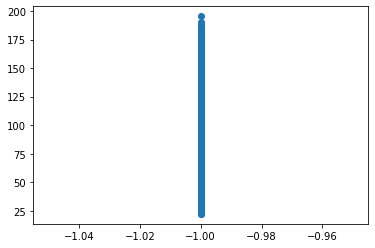

[1 1 1 ... 3 3 3]


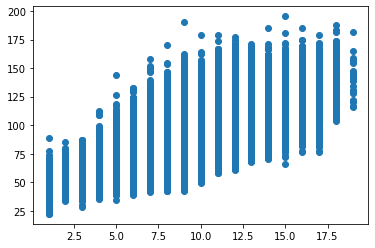

[-1 -1 -1 ... -1 -1 -1]


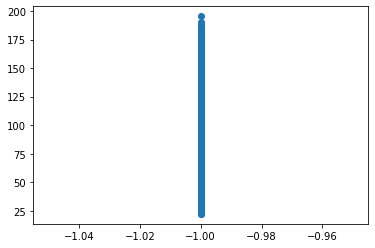

[1 1 1 ... 3 3 3]


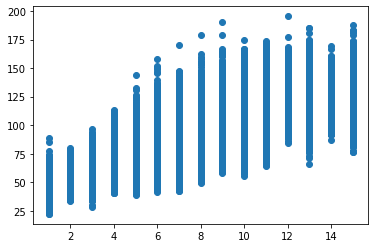

[-1 -1 -1 ... -1 -1 -1]


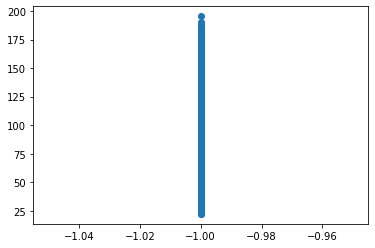

[1 1 1 ... 4 4 4]


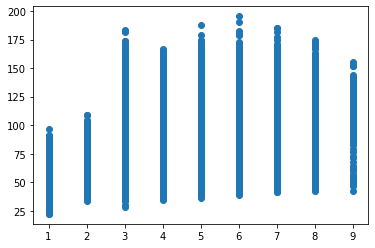

[-1 -1 -1 ... -1 -1 -1]


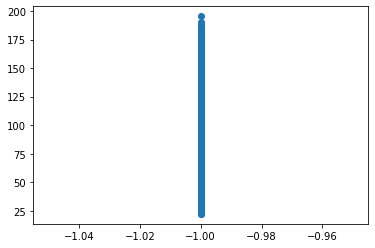

[1 1 1 ... 4 4 4]


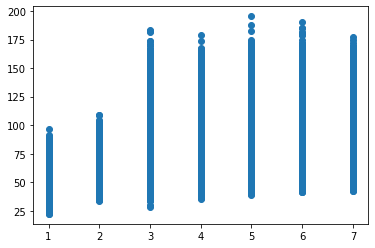

[-1 -1 -1 ... -1 -1 -1]


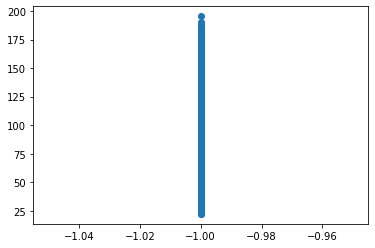

[1 1 1 ... 3 3 3]


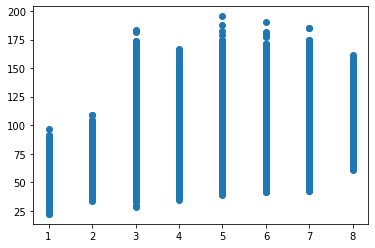

[-1 -1 -1 ... -1 -1 -1]


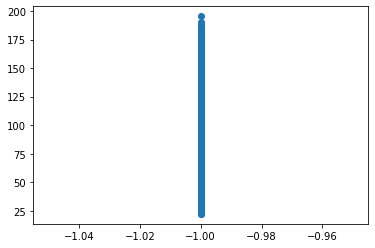

[1 1 1 ... 3 3 3]


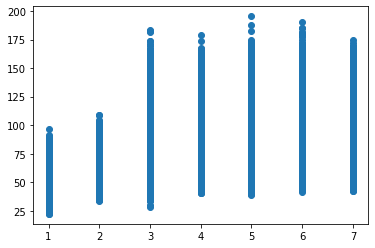

[-1 -1 -1 ... -1 -1 -1]


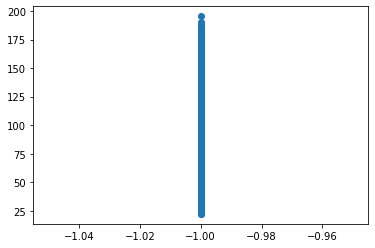

[1 1 1 ... 4 4 4]


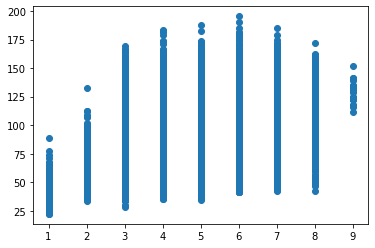

[-1 -1 -1 ... -1 -1 -1]


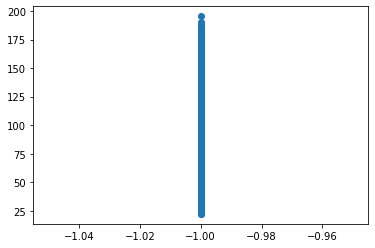

[1 1 1 ... 4 4 4]


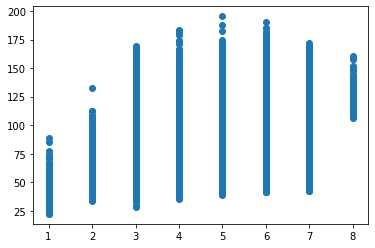

[-1 -1 -1 ... -1 -1 -1]


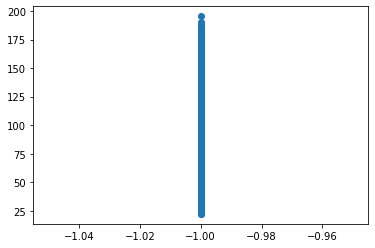

[1 1 1 ... 3 3 3]


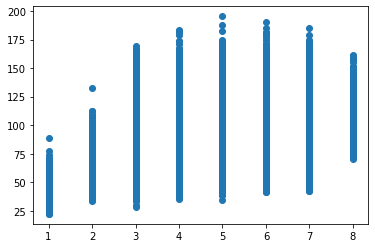

[-1 -1 -1 ... -1 -1 -1]


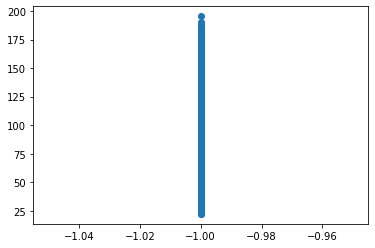

[1 1 1 ... 3 3 3]


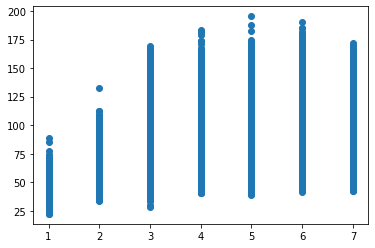

[-1 -1 -1 ... -1 -1 -1]


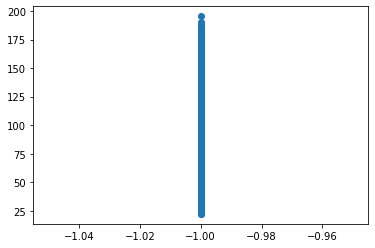

[1 1 1 ... 4 4 4]


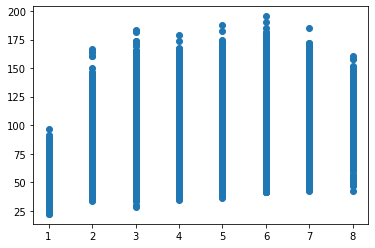

[-1 -1 -1 ... -1 -1 -1]


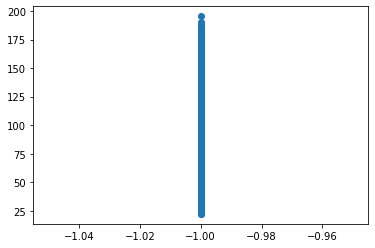

[1 1 1 ... 4 4 4]


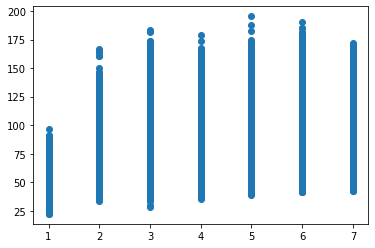

[-1 -1 -1 ... -1 -1 -1]


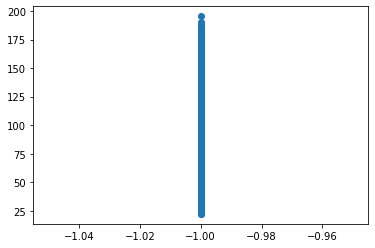

[1 1 1 ... 3 3 3]


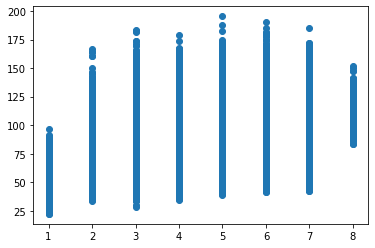

[-1 -1 -1 ... -1 -1 -1]


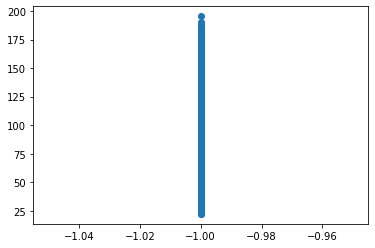

[1 1 1 ... 3 3 3]


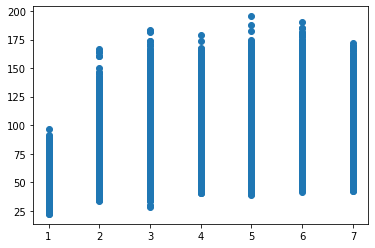

[2 2 2 ... 4 4 4]


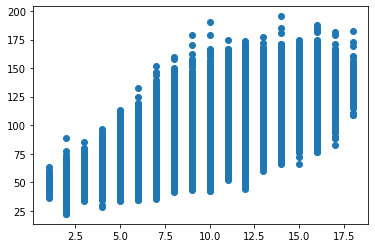

[1 1 1 ... 4 4 4]


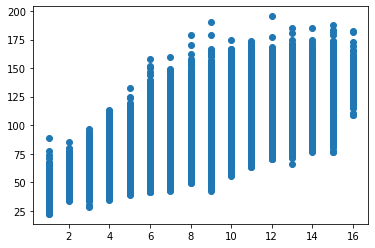

[2 2 2 ... 4 4 4]


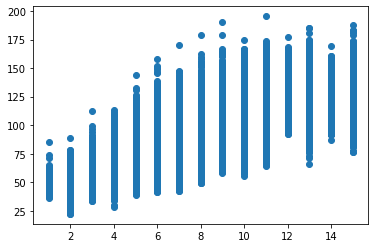

[1 1 1 ... 4 4 4]


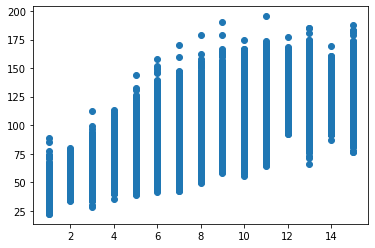

[2 2 2 ... 3 3 3]


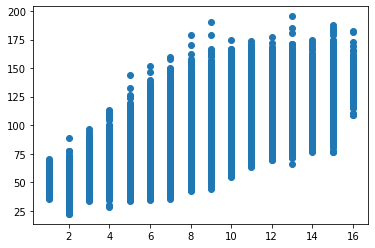

[1 1 1 ... 3 3 3]


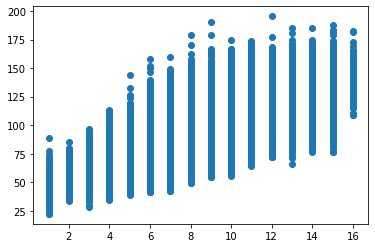

[2 2 2 ... 3 3 3]


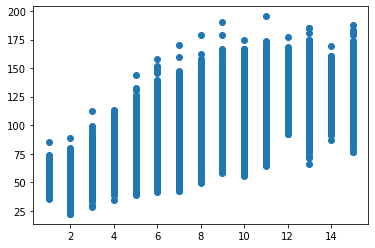

[1 1 1 ... 3 3 3]


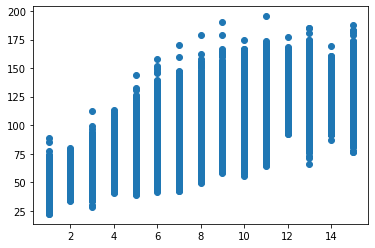

[1 1 1 ... 4 4 4]


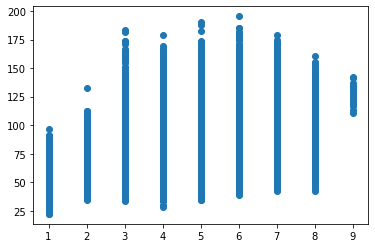

[1 1 1 ... 4 4 4]


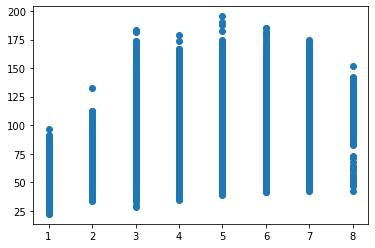

[1 1 1 ... 4 4 4]


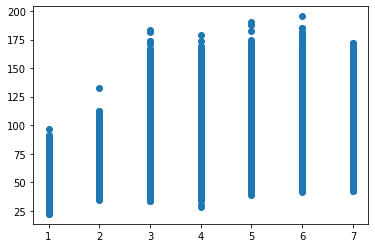

[1 1 1 ... 4 4 4]


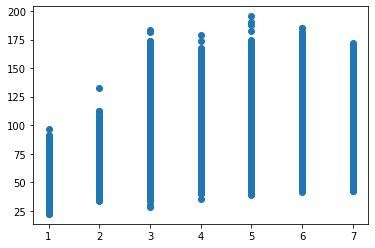

[1 1 1 ... 3 3 3]


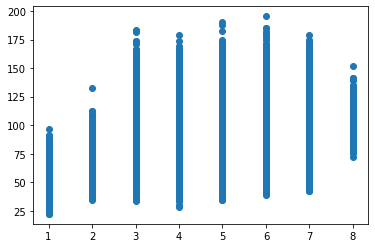

[1 1 1 ... 3 3 3]


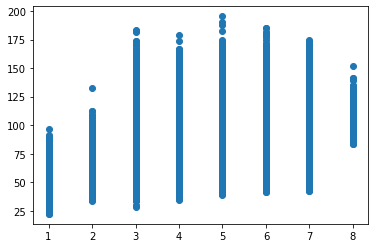

[1 1 1 ... 3 3 3]


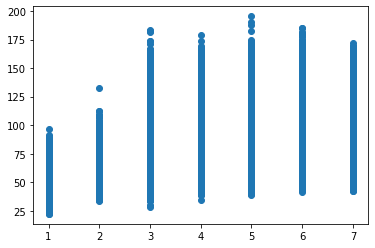

[1 1 1 ... 3 3 3]


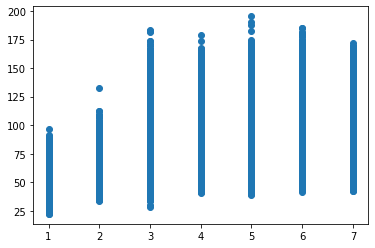

[2 2 2 ... 4 4 4]


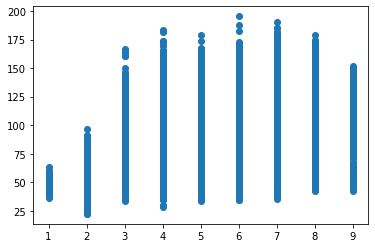

[1 1 1 ... 4 4 4]


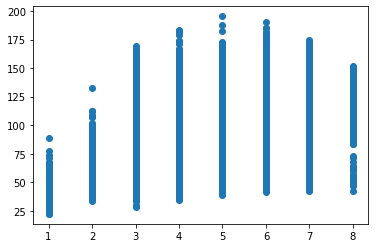

[2 2 2 ... 4 4 4]


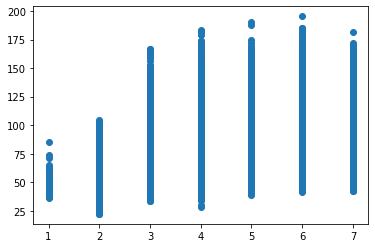

[1 1 1 ... 4 4 4]


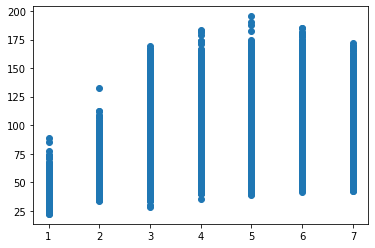

[2 2 2 ... 3 3 3]


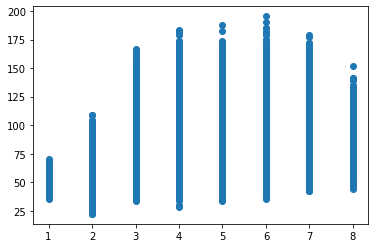

[1 1 1 ... 3 3 3]


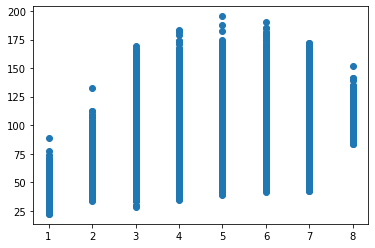

[2 2 2 ... 3 3 3]


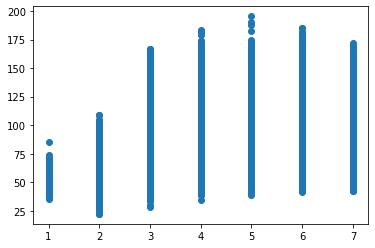

[1 1 1 ... 3 3 3]


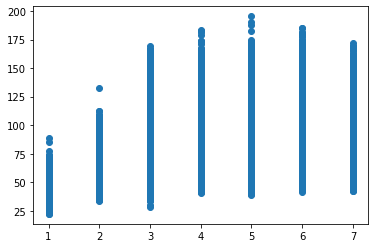

[1 1 1 ... 4 4 4]


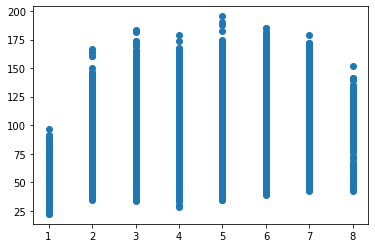

[1 1 1 ... 4 4 4]


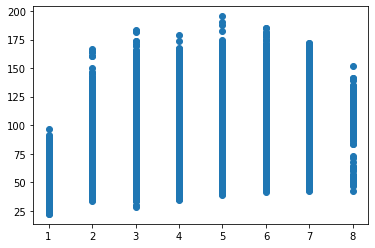

[1 1 1 ... 4 4 4]


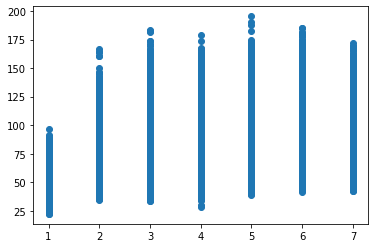

[1 1 1 ... 4 4 4]


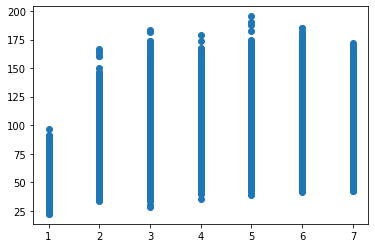

[1 1 1 ... 3 3 3]


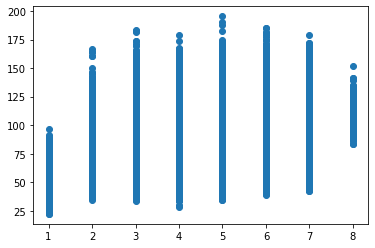

[1 1 1 ... 3 3 3]


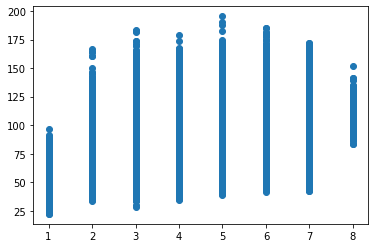

[1 1 1 ... 3 3 3]


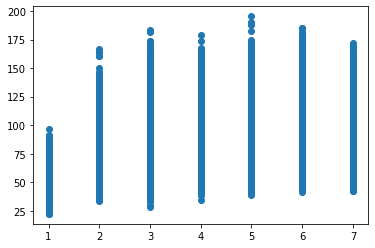

[1 1 1 ... 3 3 3]


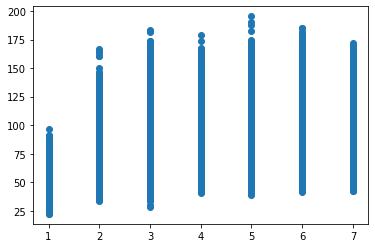

[-1 -1 -1 ... -1 -1 -1]


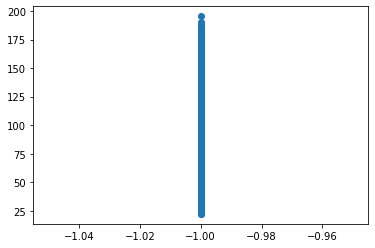

[-1 -1 -1 ... -1 -1 -1]


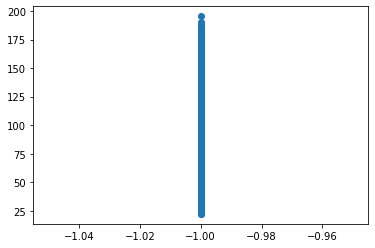

[2 2 2 ... 7 7 7]


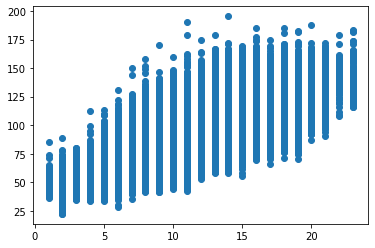

[1 1 1 ... 7 7 7]


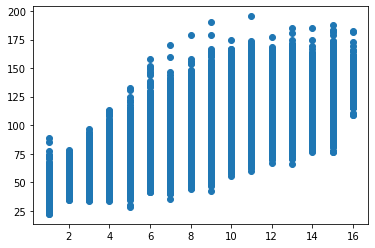

[5 5 5 ... 3 3 3]


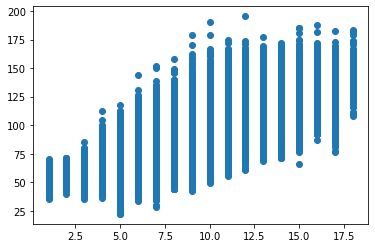

[1 1 1 ... 3 3 3]


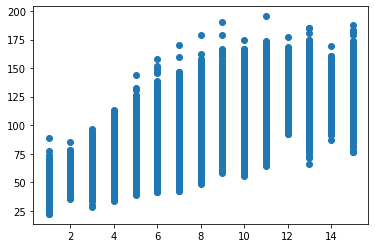

[2 2 2 ... 3 3 3]


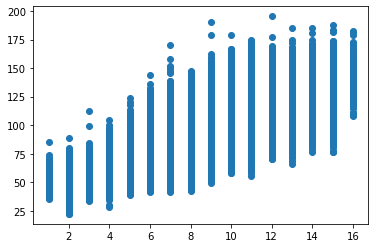

[1 1 1 ... 3 3 3]


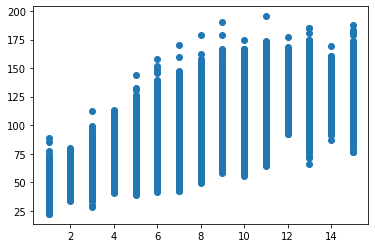

[-1 -1 -1 ... -1 -1 -1]


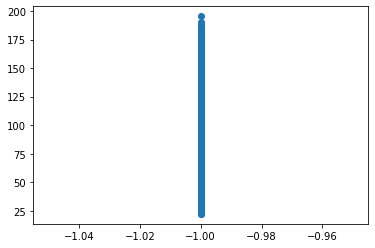

[-1 -1 -1 ... -1 -1 -1]


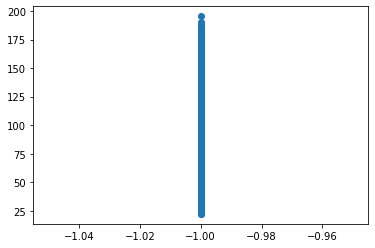

[1 1 1 ... 7 7 7]


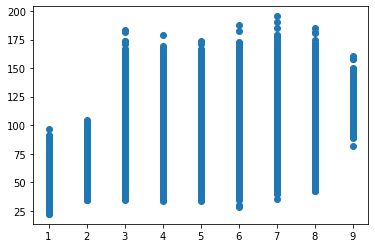

[1 1 1 ... 6 6 6]


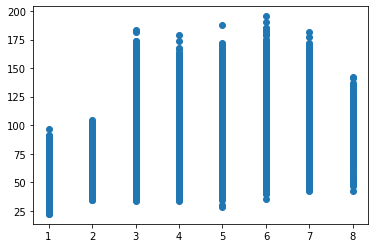

[1 1 1 ... 3 3 3]


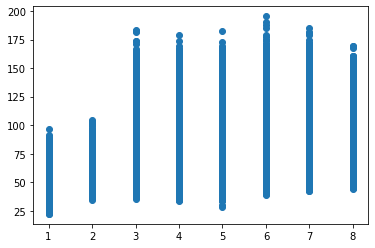

[1 1 1 ... 3 3 3]


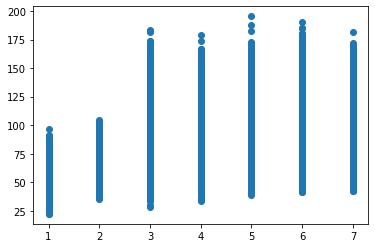

[1 1 1 ... 3 3 3]


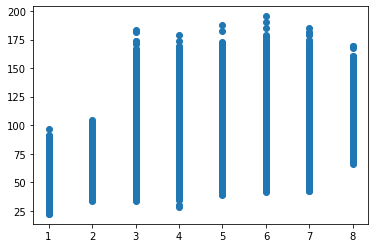

[1 1 1 ... 3 3 3]


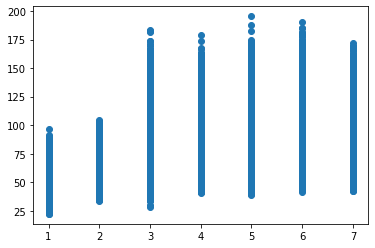

[-1 -1 -1 ... -1 -1 -1]


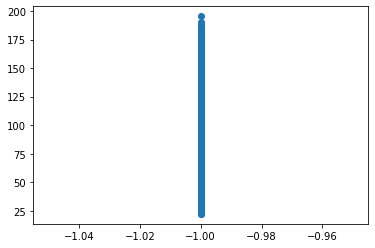

[1 1 1 ... 5 5 5]


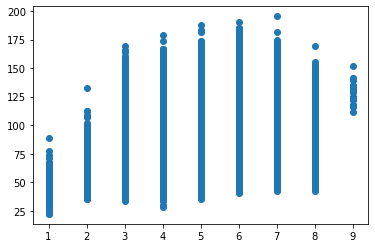

[2 2 2 ... 7 7 7]


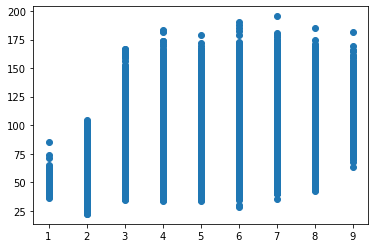

[1 1 1 ... 5 5 5]


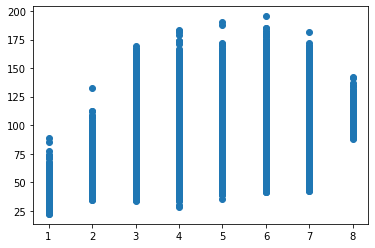

[2 2 2 ... 3 3 3]


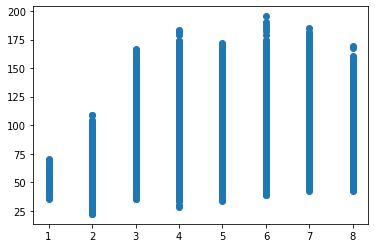

[1 1 1 ... 3 3 3]


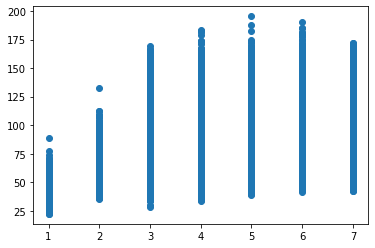

[2 2 2 ... 3 3 3]


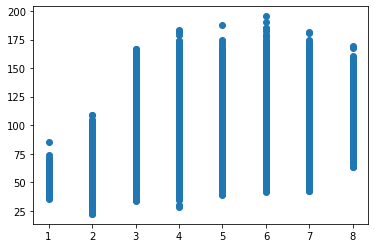

[1 1 1 ... 3 3 3]


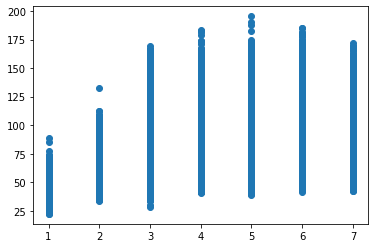

[-1 -1 -1 ... -1 -1 -1]


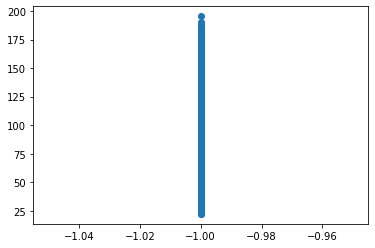

[1 1 1 ... 5 5 5]


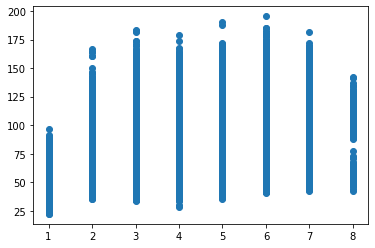

[1 1 1 ... 7 7 7]


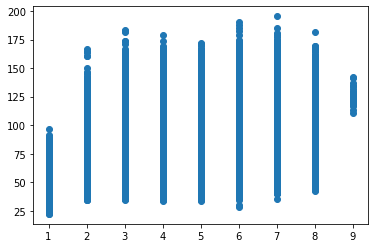

[1 1 1 ... 5 5 5]


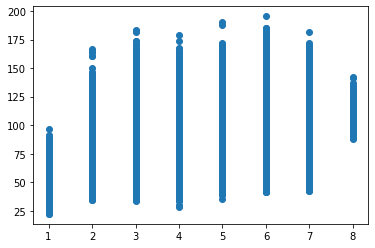

[1 1 1 ... 3 3 3]


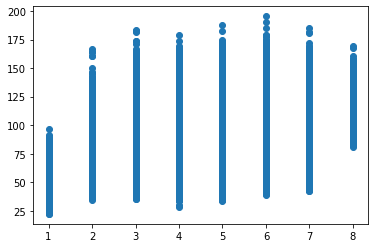

[1 1 1 ... 3 3 3]


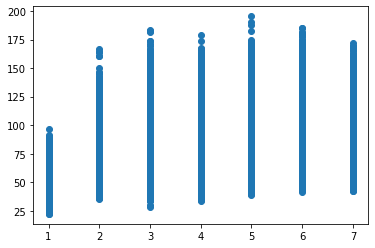

[1 1 1 ... 3 3 3]


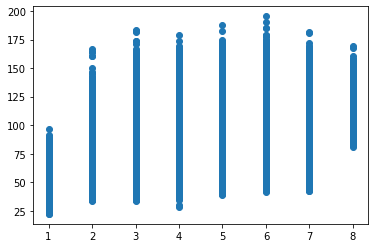

[1 1 1 ... 3 3 3]


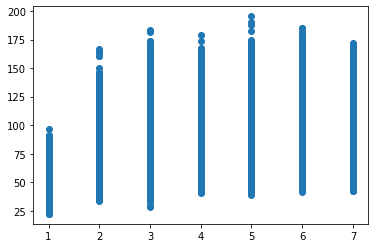

[-1 -1 -1 ... -1 -1 -1]


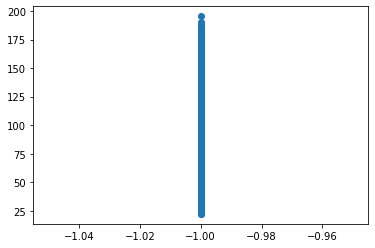

[1 1 1 ... 4 4 4]


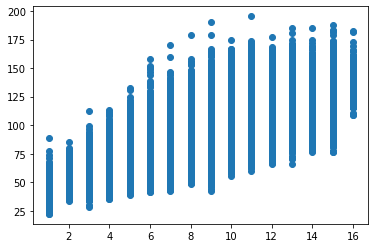

[2 2 2 ... 4 4 4]


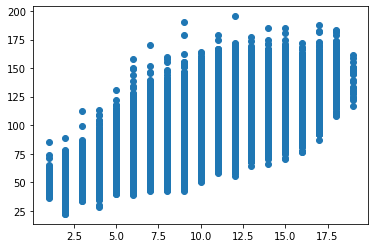

[1 1 1 ... 4 4 4]


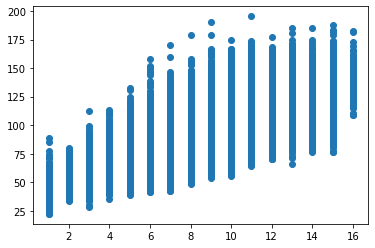

[3 3 3 ... 3 3 3]


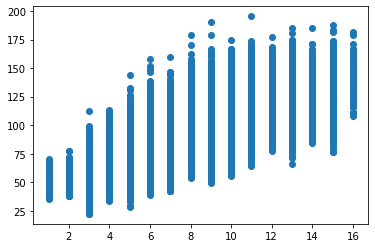

[1 1 1 ... 3 3 3]


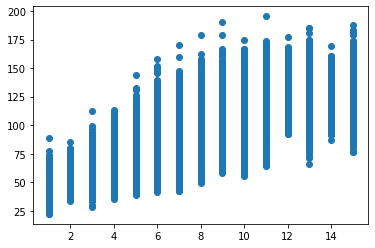

[2 2 2 ... 3 3 3]


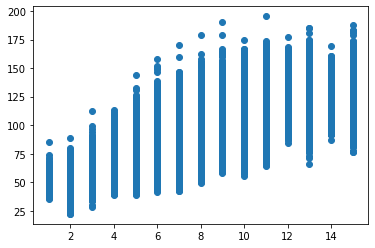

[1 1 1 ... 3 3 3]


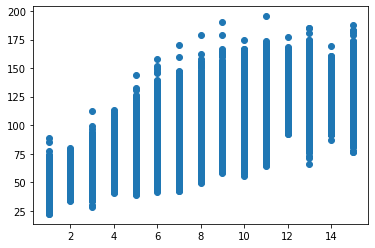

[-1 -1 -1 ... -1 -1 -1]


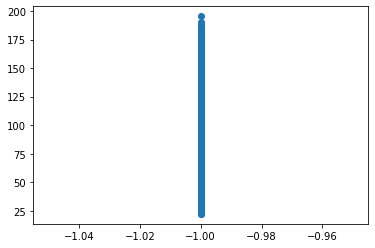

[1 1 1 ... 4 4 4]


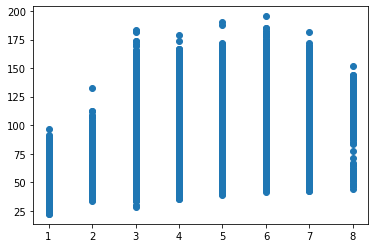

[1 1 1 ... 4 4 4]


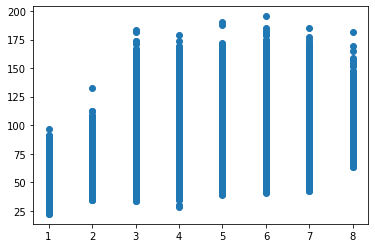

[1 1 1 ... 4 4 4]


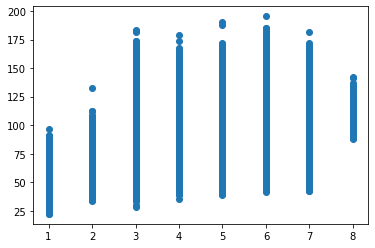

[1 1 1 ... 3 3 3]


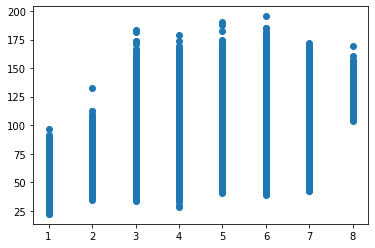

[1 1 1 ... 3 3 3]


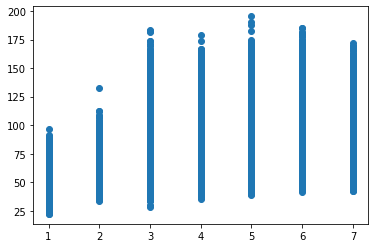

[1 1 1 ... 3 3 3]


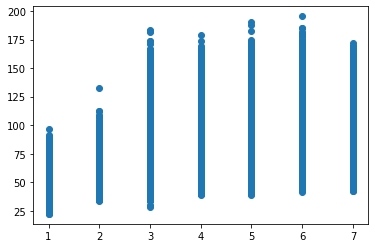

[1 1 1 ... 3 3 3]


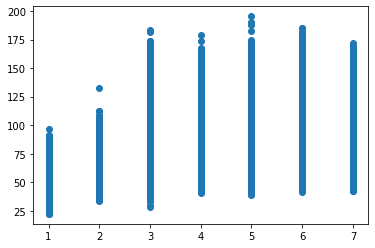

[-1 -1 -1 ... -1 -1 -1]


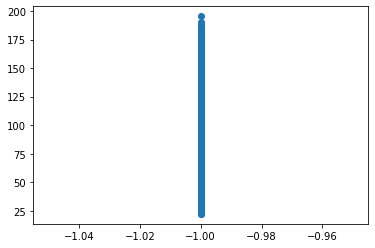

[1 1 1 ... 4 4 4]


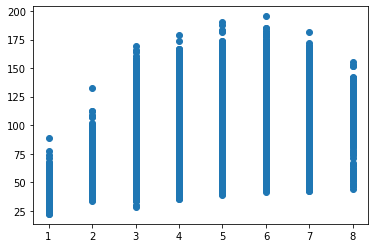

[2 2 2 ... 4 4 4]


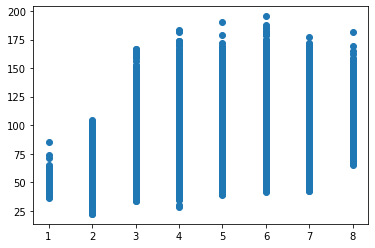

[1 1 1 ... 4 4 4]


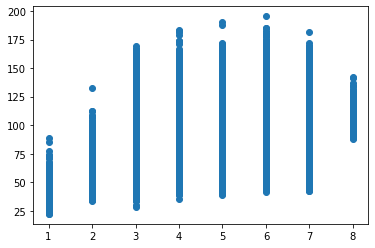

[2 2 2 ... 3 3 3]


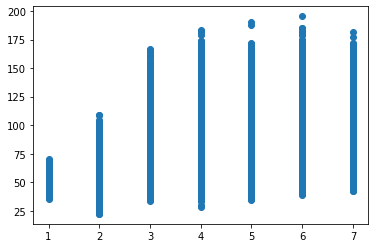

[1 1 1 ... 3 3 3]


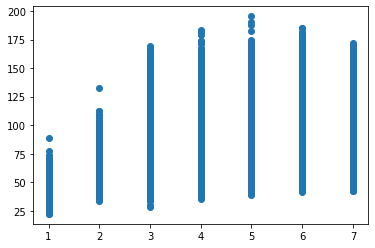

[2 2 2 ... 3 3 3]


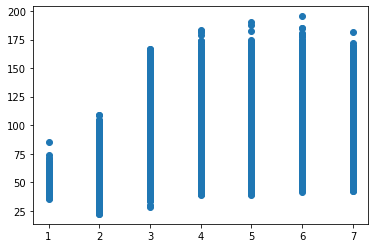

[1 1 1 ... 3 3 3]


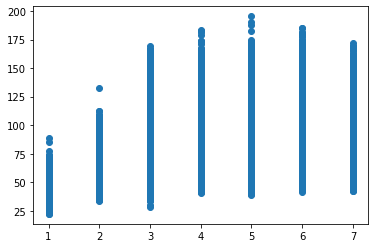

[-1 -1 -1 ... -1 -1 -1]


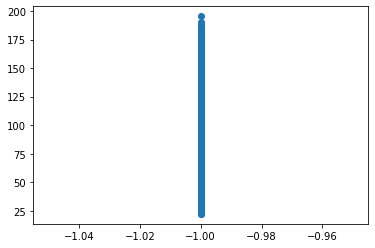

[1 1 1 ... 4 4 4]


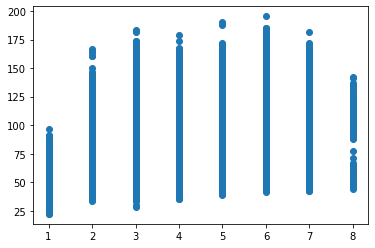

[1 1 1 ... 4 4 4]


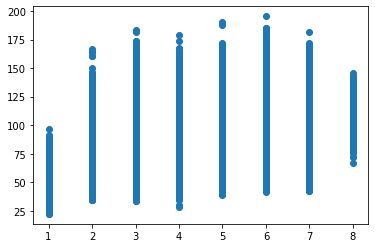

[1 1 1 ... 4 4 4]


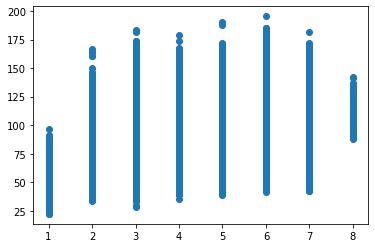

[1 1 1 ... 3 3 3]


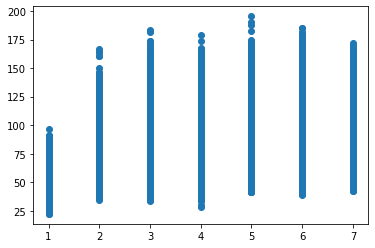

[1 1 1 ... 3 3 3]


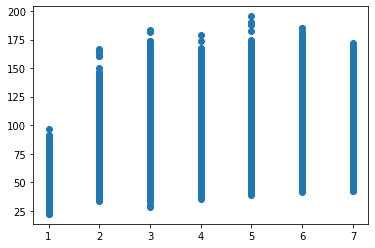

[1 1 1 ... 3 3 3]


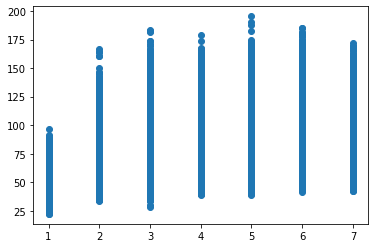

[1 1 1 ... 3 3 3]


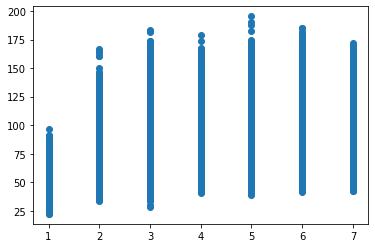

[3 3 3 ... 7 7 7]


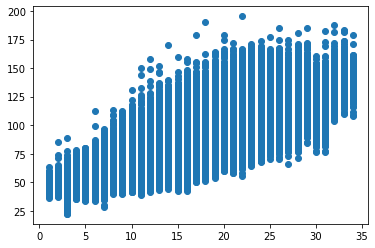

[1 1 1 ... 7 7 7]


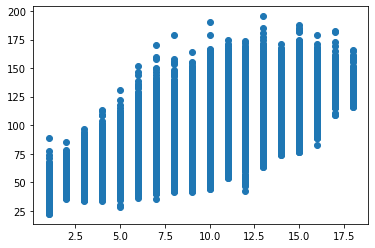

[2 2 2 ... 7 7 7]


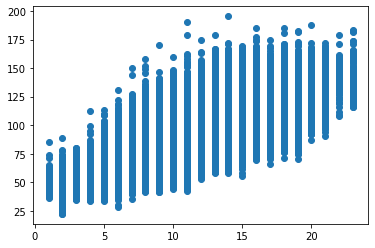

[1 1 1 ... 7 7 7]


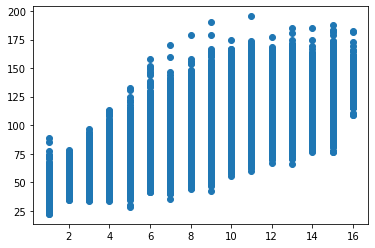

[3 3 3 ... 3 3 3]


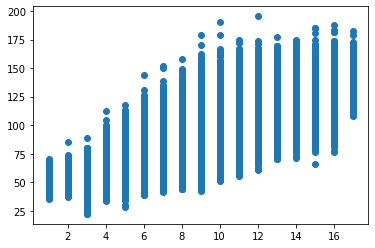

[1 1 1 ... 3 3 3]


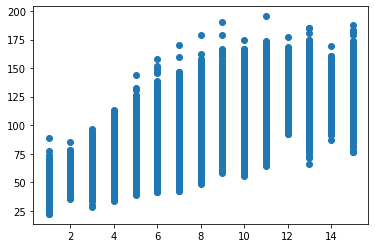

[2 2 2 ... 3 3 3]


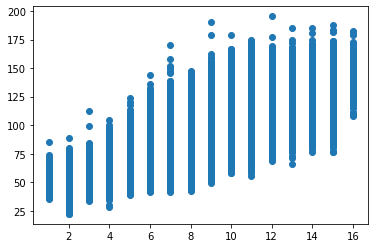

[1 1 1 ... 3 3 3]


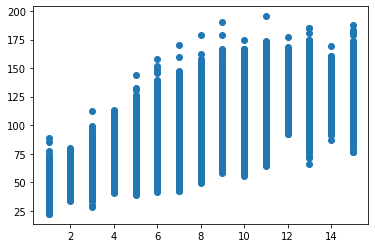

[1 1 1 ... 7 7 7]


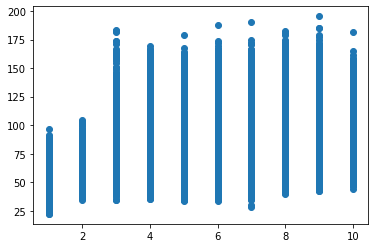

[1 1 1 ... 7 7 7]


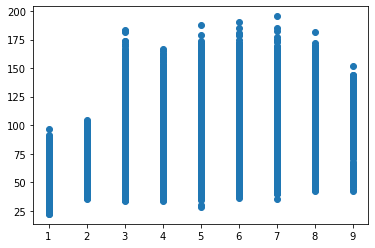

[1 1 1 ... 7 7 7]


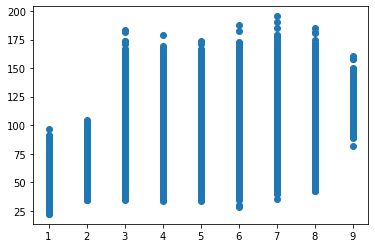

[1 1 1 ... 6 6 6]


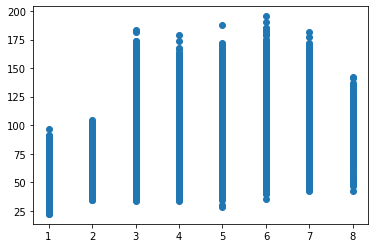

[1 1 1 ... 3 3 3]


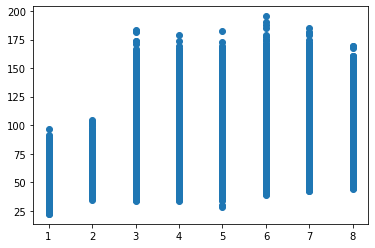

[1 1 1 ... 3 3 3]


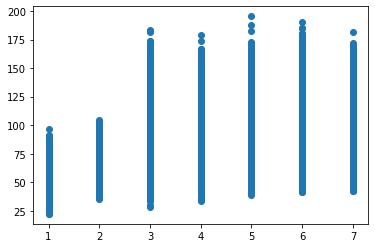

[1 1 1 ... 3 3 3]


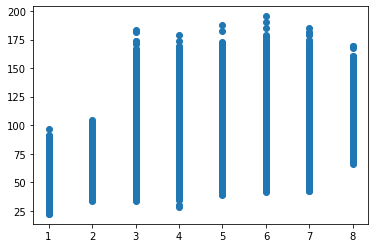

[1 1 1 ... 3 3 3]


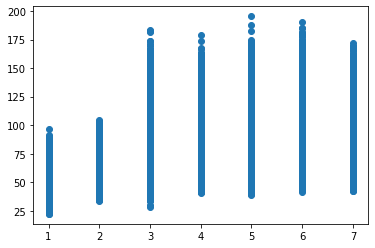

[2 2 2 ... 7 7 7]


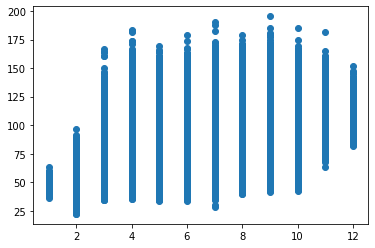

[1 1 1 ... 5 5 5]


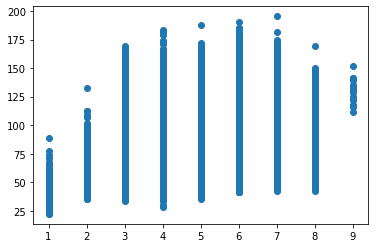

[2 2 2 ... 7 7 7]


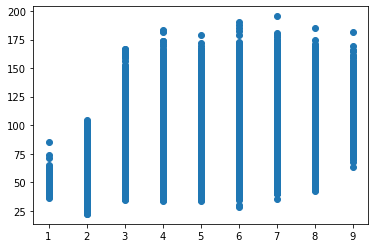

[1 1 1 ... 5 5 5]


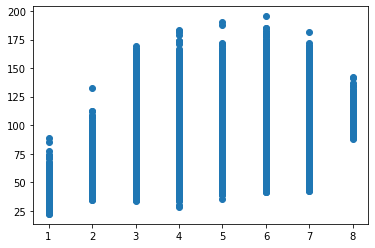

[2 2 2 ... 3 3 3]


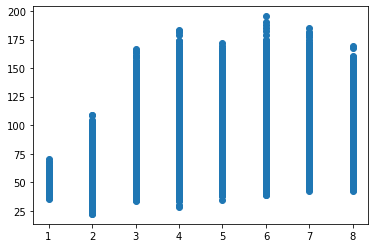

[1 1 1 ... 3 3 3]


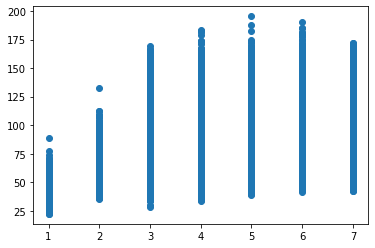

[2 2 2 ... 3 3 3]


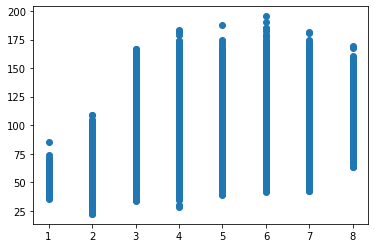

[1 1 1 ... 3 3 3]


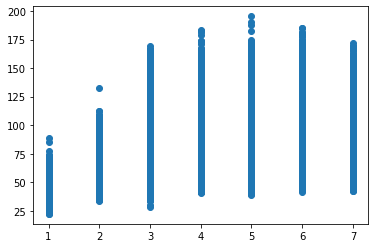

[1 1 1 ... 7 7 7]


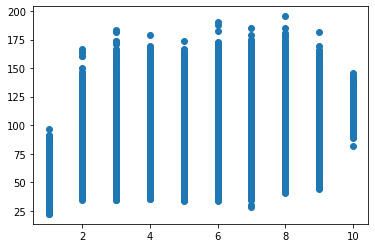

[1 1 1 ... 5 5 5]


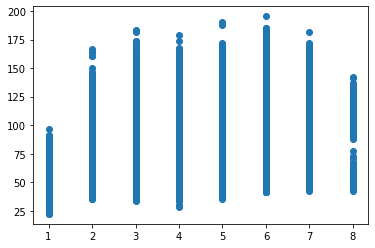

[1 1 1 ... 7 7 7]


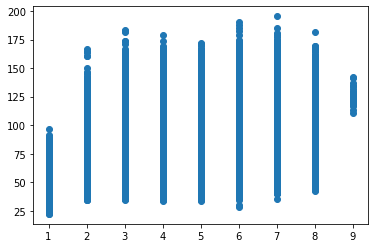

[1 1 1 ... 5 5 5]


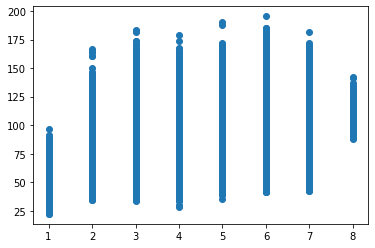

[1 1 1 ... 3 3 3]


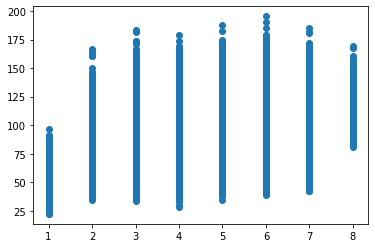

[1 1 1 ... 3 3 3]


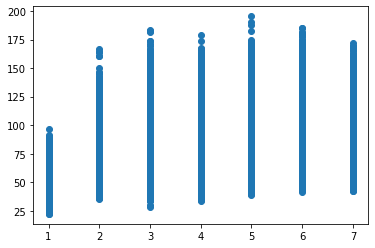

[1 1 1 ... 3 3 3]


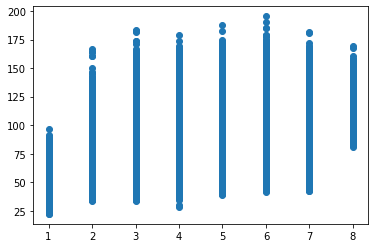

[1 1 1 ... 3 3 3]


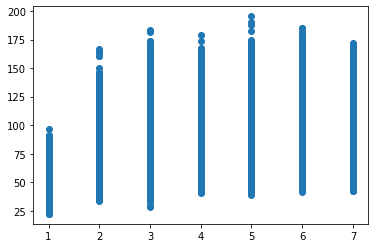

[2 2 2 ... 4 4 4]


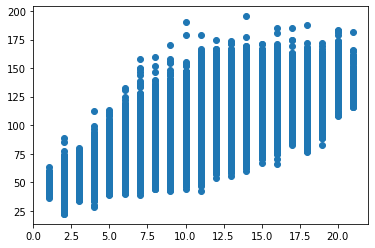

[1 1 1 ... 4 4 4]


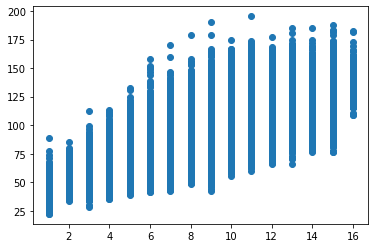

[2 2 2 ... 4 4 4]


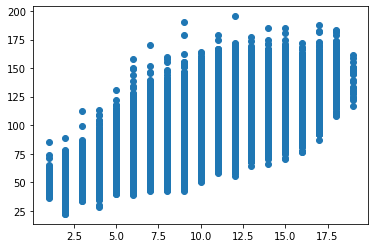

[1 1 1 ... 4 4 4]


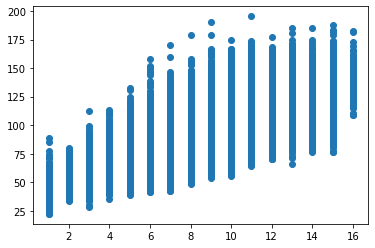

[2 2 2 ... 3 3 3]


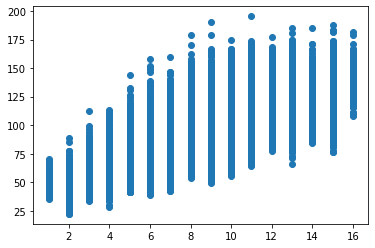

[1 1 1 ... 3 3 3]


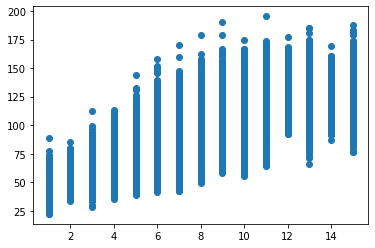

[2 2 2 ... 3 3 3]


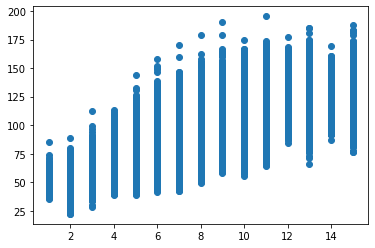

[1 1 1 ... 3 3 3]


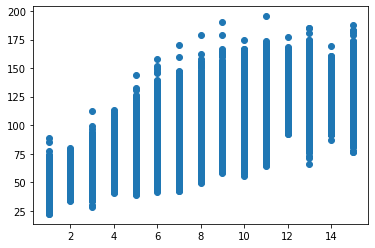

[1 1 1 ... 4 4 4]


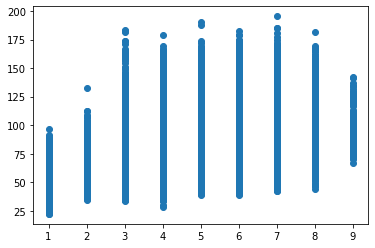

[1 1 1 ... 4 4 4]


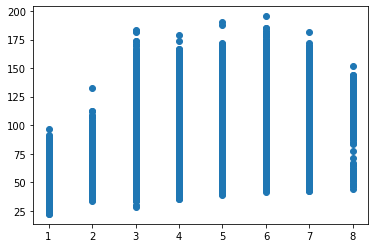

[1 1 1 ... 4 4 4]


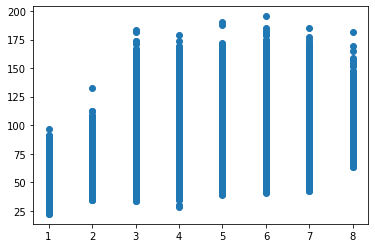

[1 1 1 ... 4 4 4]


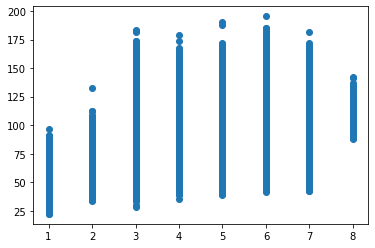

[1 1 1 ... 3 3 3]


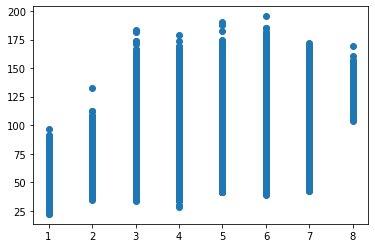

[1 1 1 ... 3 3 3]


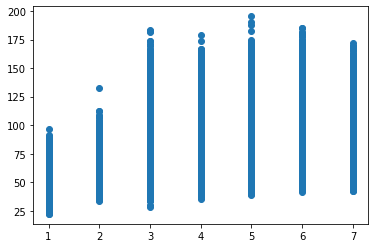

[1 1 1 ... 3 3 3]


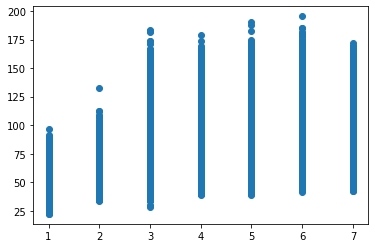

[1 1 1 ... 3 3 3]


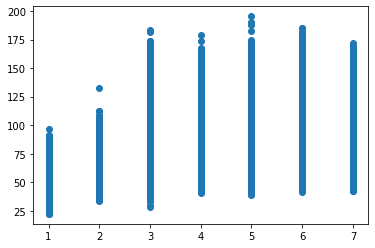

[2 2 2 ... 4 4 4]


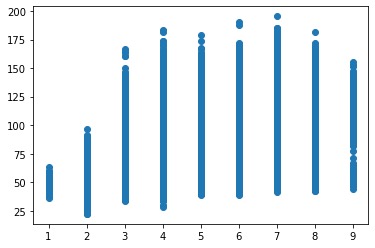

[1 1 1 ... 4 4 4]


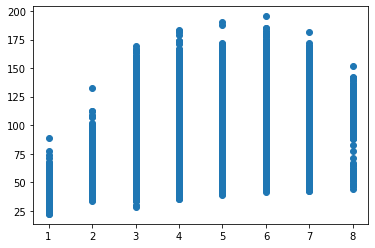

[2 2 2 ... 4 4 4]


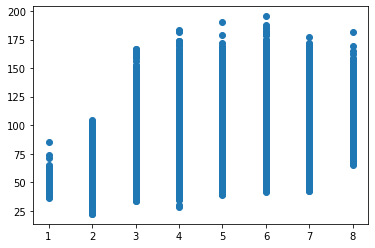

[1 1 1 ... 4 4 4]


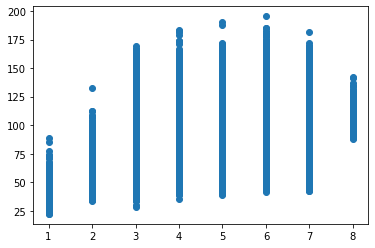

[2 2 2 ... 3 3 3]


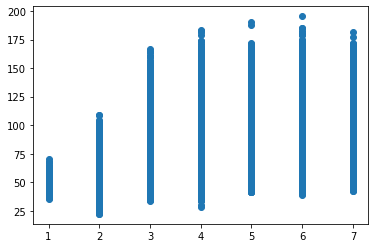

[1 1 1 ... 3 3 3]


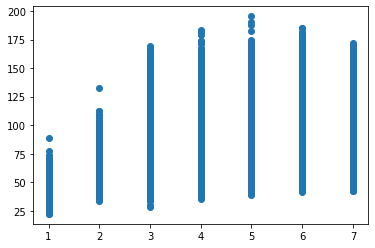

[2 2 2 ... 3 3 3]


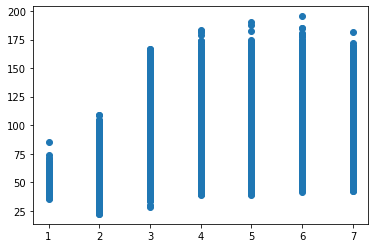

[1 1 1 ... 3 3 3]


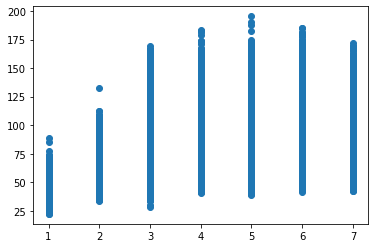

[1 1 1 ... 4 4 4]


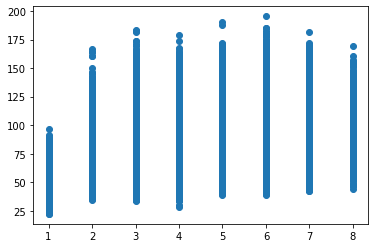

[1 1 1 ... 4 4 4]


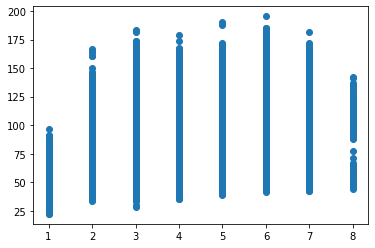

[1 1 1 ... 4 4 4]


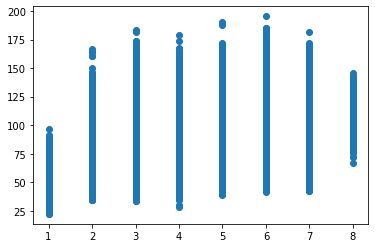

[1 1 1 ... 4 4 4]


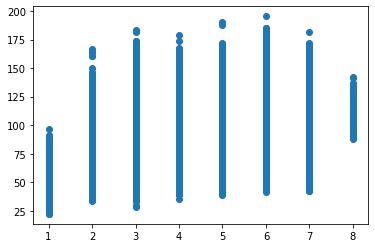

[1 1 1 ... 3 3 3]


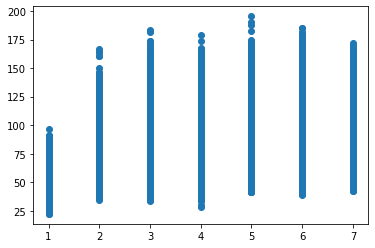

[1 1 1 ... 3 3 3]


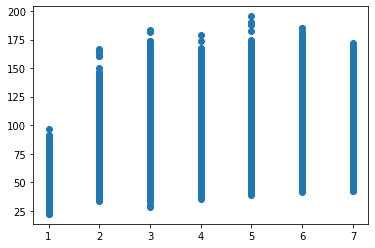

[1 1 1 ... 3 3 3]


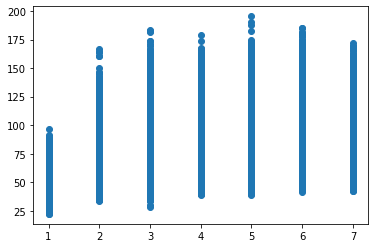

[1 1 1 ... 3 3 3]


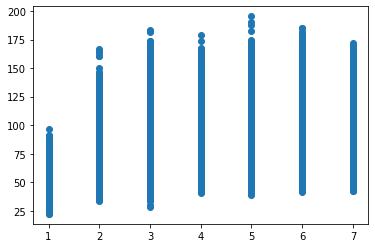

[-1 -1 -1 ... -1 -1 -1]


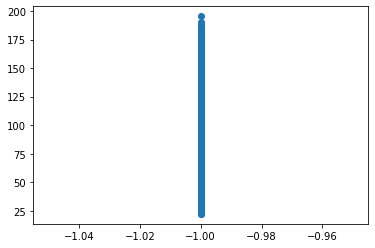

[-1 -1 -1 ... -1 -1 -1]


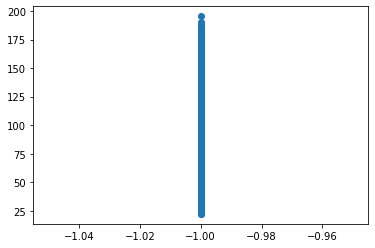

[-1 -1 -1 ... -1 -1 -1]


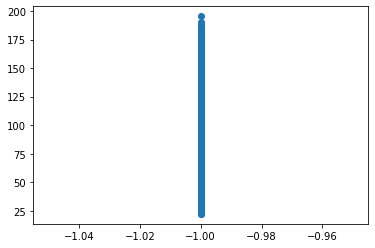

[1 1 1 ... 5 5 5]


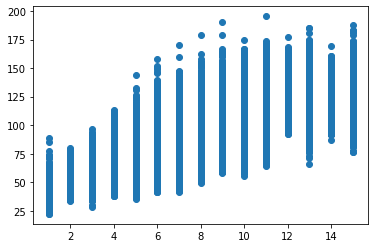

[2 2 2 ... 3 3 3]


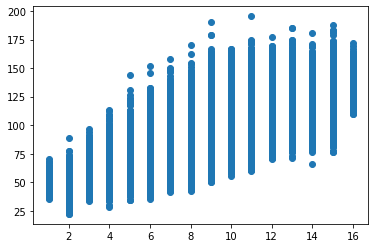

[1 1 1 ... 3 3 3]


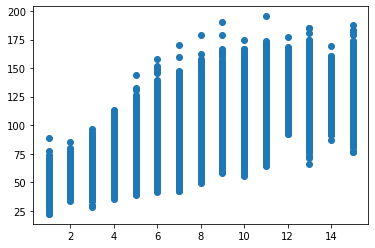

[2 2 2 ... 3 3 3]


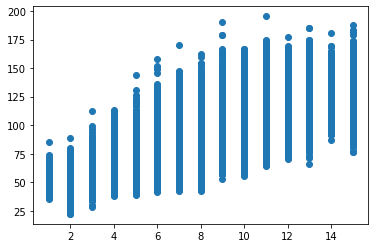

[1 1 1 ... 3 3 3]


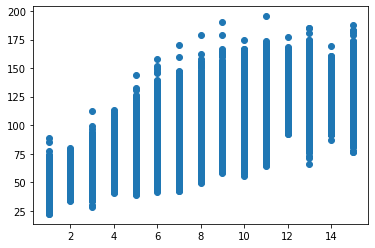

[-1 -1 -1 ... -1 -1 -1]


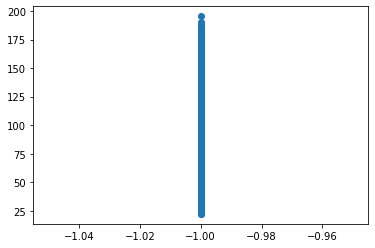

[-1 -1 -1 ... -1 -1 -1]


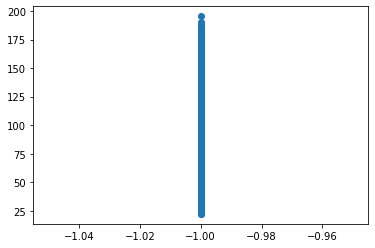

[-1 -1 -1 ... -1 -1 -1]


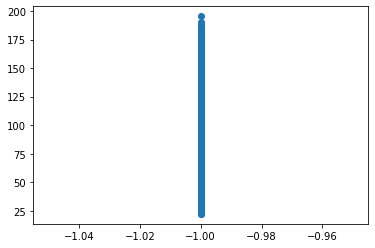

[1 1 1 ... 5 5 5]


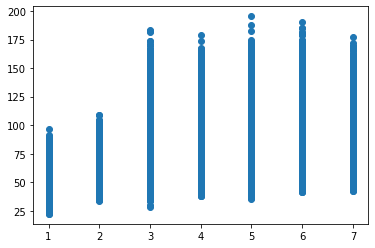

[-1 -1 -1 ... -1 -1 -1]


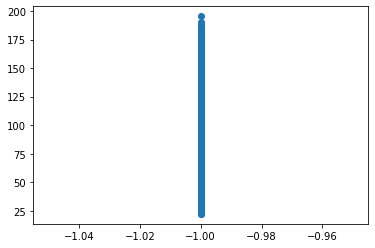

[1 1 1 ... 3 3 3]


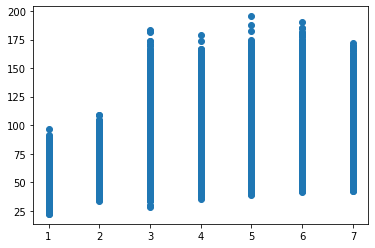

[-1 -1 -1 ... -1 -1 -1]


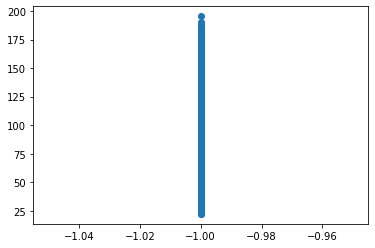

[1 1 1 ... 3 3 3]


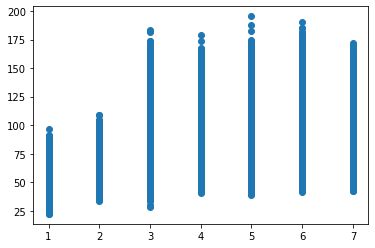

[-1 -1 -1 ... -1 -1 -1]


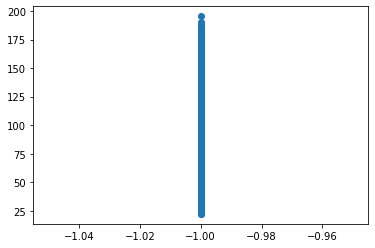

[1 1 1 ... 4 4 4]


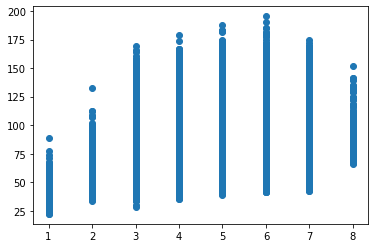

[2 2 2 ... 5 5 5]


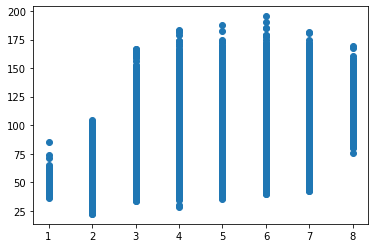

[1 1 1 ... 4 4 4]


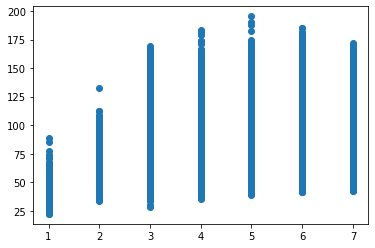

[2 2 2 ... 3 3 3]


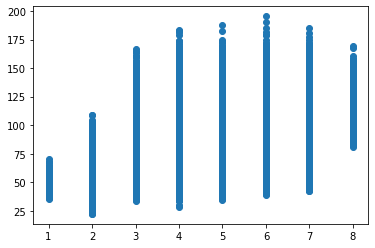

[1 1 1 ... 3 3 3]


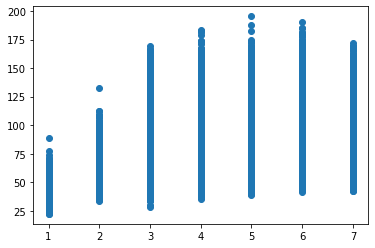

[2 2 2 ... 3 3 3]


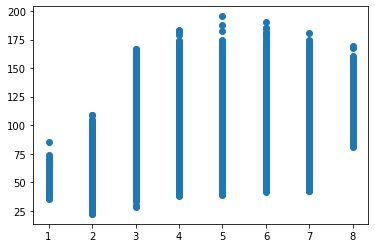

[1 1 1 ... 3 3 3]


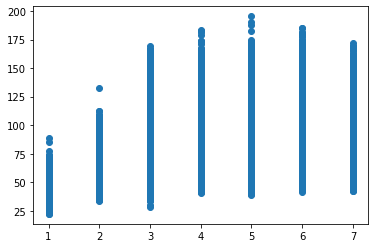

[-1 -1 -1 ... -1 -1 -1]


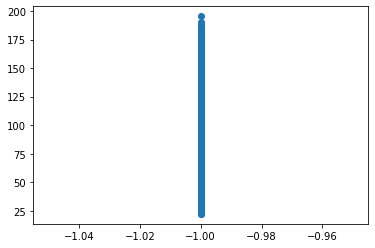

[1 1 1 ... 4 4 4]


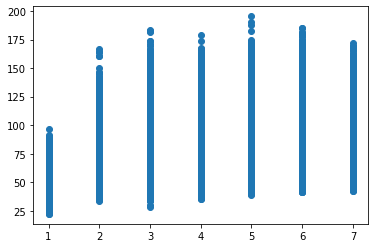

[-1 -1 -1 ... -1 -1 -1]


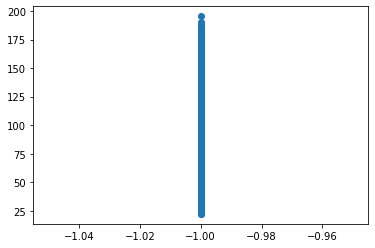

[1 1 1 ... 4 4 4]


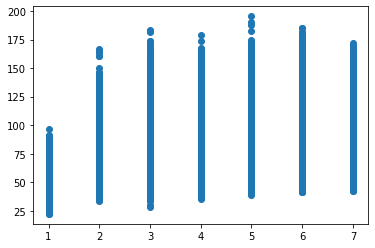

[1 1 1 ... 3 3 3]


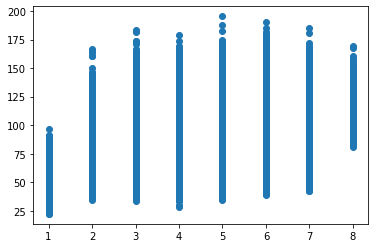

[1 1 1 ... 3 3 3]


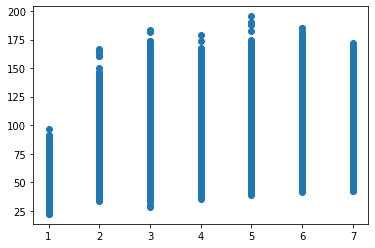

[1 1 1 ... 3 3 3]


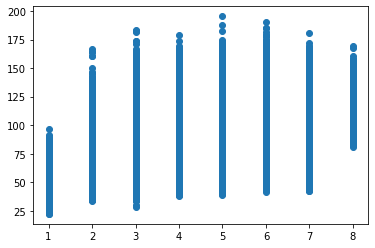

[1 1 1 ... 3 3 3]


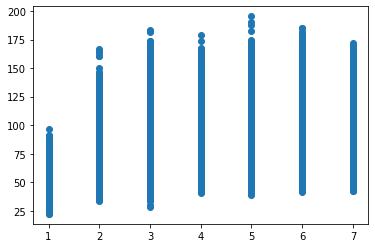

[-1 -1 -1 ... -1 -1 -1]


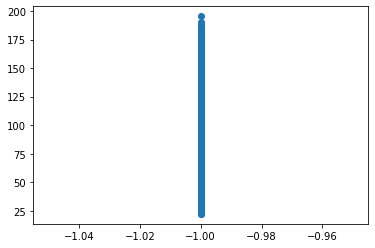

[1 1 1 ... 4 4 4]


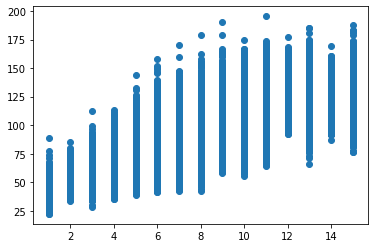

[2 2 2 ... 4 4 4]


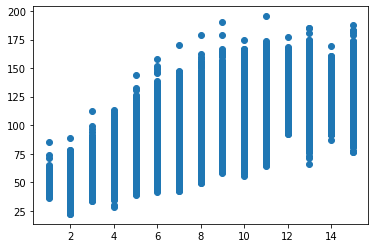

[1 1 1 ... 4 4 4]


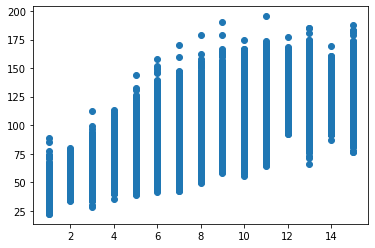

[2 2 2 ... 3 3 3]


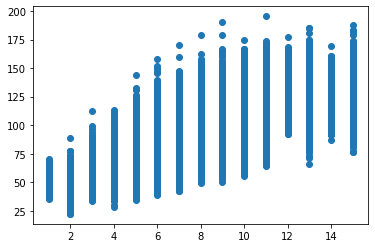

[1 1 1 ... 3 3 3]


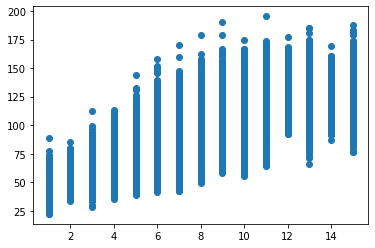

[2 2 2 ... 3 3 3]


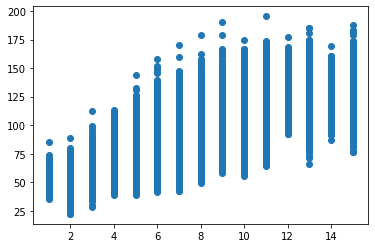

[1 1 1 ... 3 3 3]


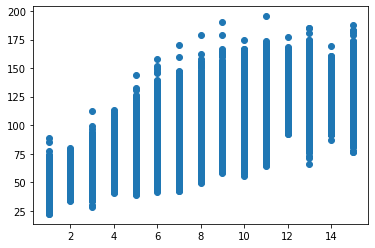

[-1 -1 -1 ... -1 -1 -1]


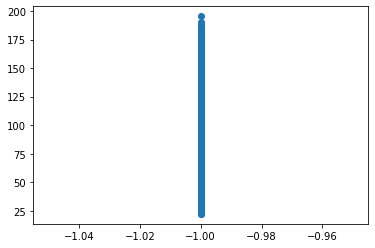

[1 1 1 ... 4 4 4]


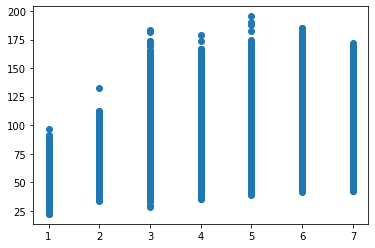

[1 1 1 ... 4 4 4]


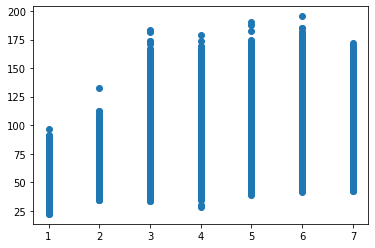

[1 1 1 ... 4 4 4]


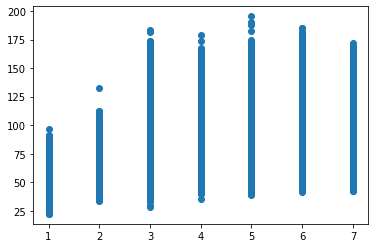

[1 1 1 ... 3 3 3]


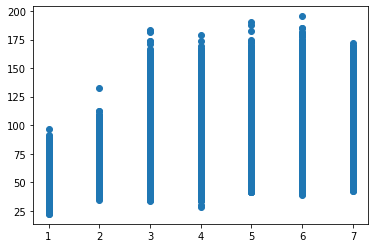

[1 1 1 ... 3 3 3]


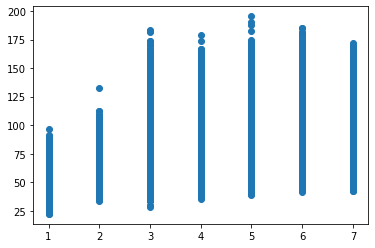

[1 1 1 ... 3 3 3]


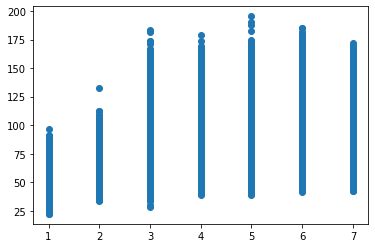

[1 1 1 ... 3 3 3]


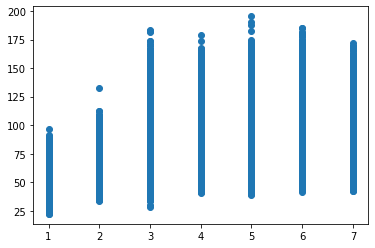

[-1 -1 -1 ... -1 -1 -1]


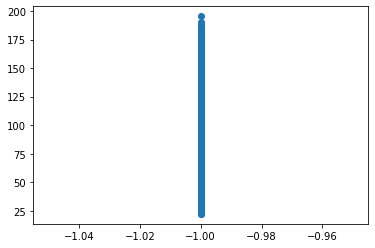

[1 1 1 ... 4 4 4]


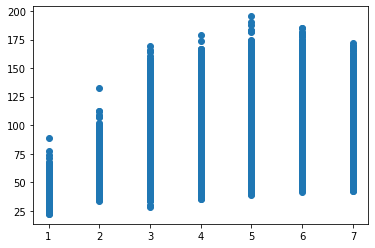

[2 2 2 ... 4 4 4]


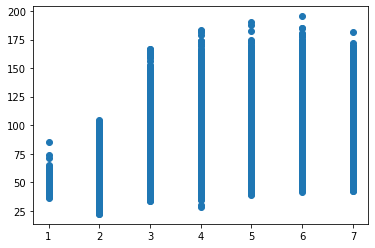

[1 1 1 ... 4 4 4]


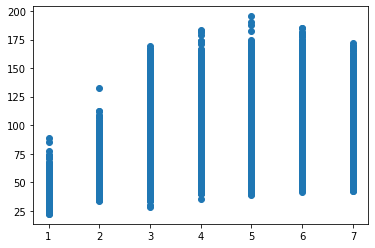

[2 2 2 ... 3 3 3]


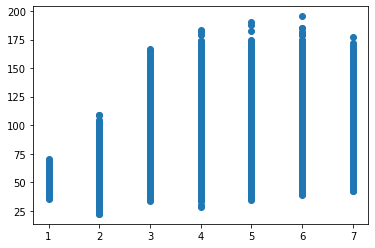

[1 1 1 ... 3 3 3]


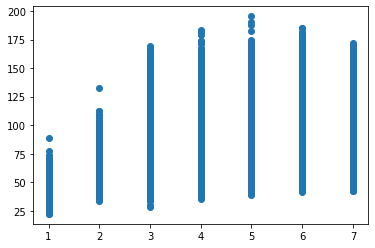

[2 2 2 ... 3 3 3]


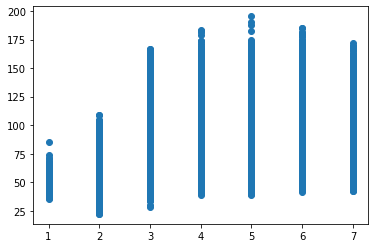

[1 1 1 ... 3 3 3]


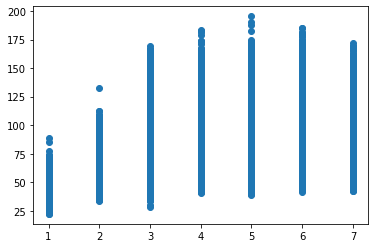

[-1 -1 -1 ... -1 -1 -1]


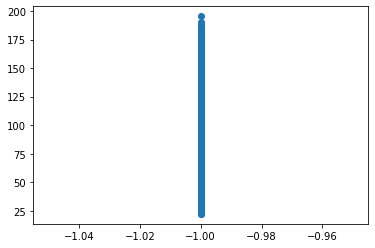

[1 1 1 ... 4 4 4]


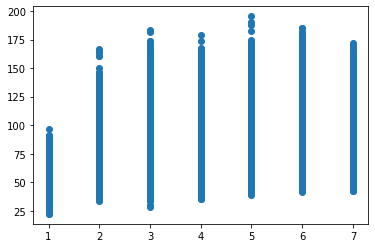

[1 1 1 ... 4 4 4]


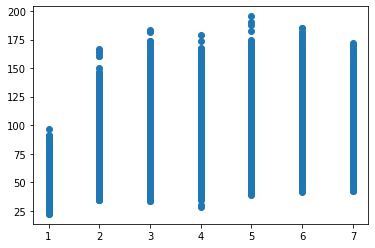

[1 1 1 ... 4 4 4]


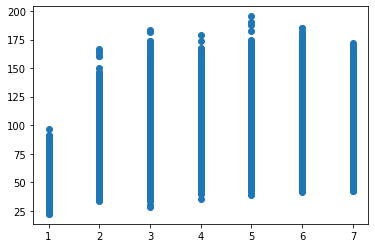

[1 1 1 ... 3 3 3]


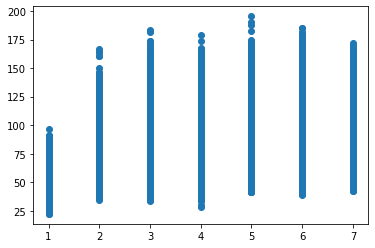

[1 1 1 ... 3 3 3]


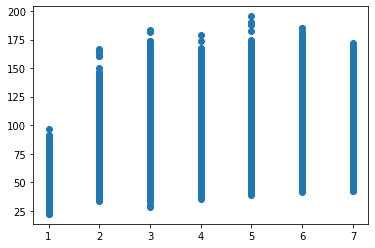

[1 1 1 ... 3 3 3]


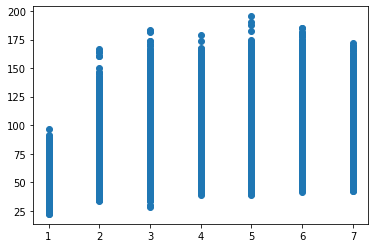

[1 1 1 ... 3 3 3]


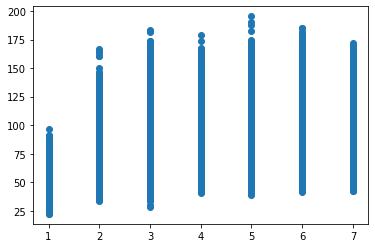

[2 2 2 ... 4 4 4]


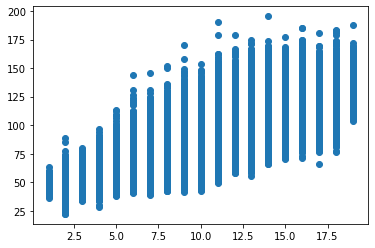

[1 1 1 ... 4 4 4]


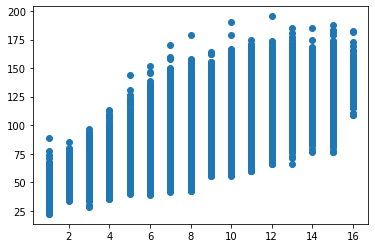

[-1 -1 -1 ... -1 -1 -1]


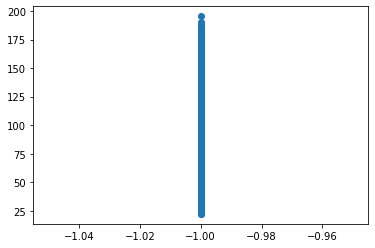

[1 1 1 ... 4 4 4]


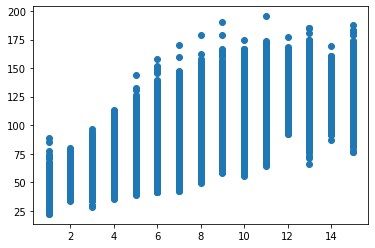

[2 2 2 ... 3 3 3]


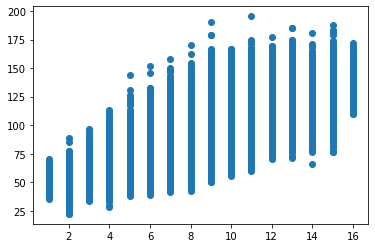

[1 1 1 ... 3 3 3]


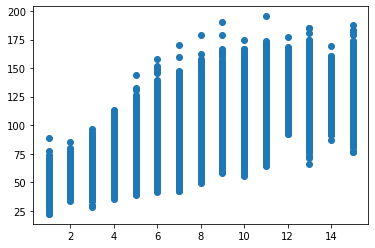

[2 2 2 ... 3 3 3]


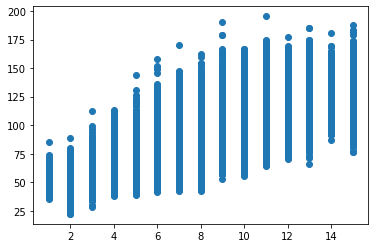

[1 1 1 ... 3 3 3]


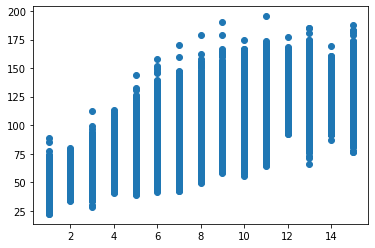

[-1 -1 -1 ... -1 -1 -1]


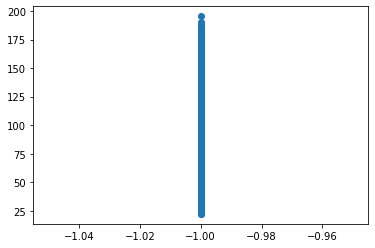

[1 1 1 ... 4 4 4]


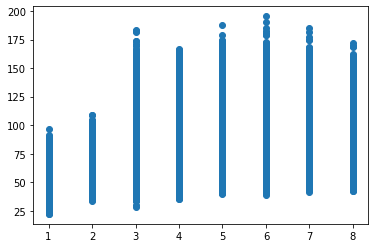

[-1 -1 -1 ... -1 -1 -1]


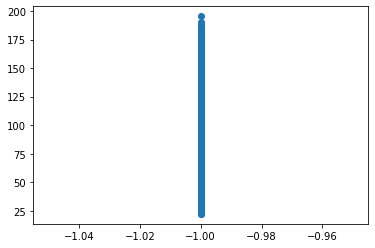

[1 1 1 ... 4 4 4]


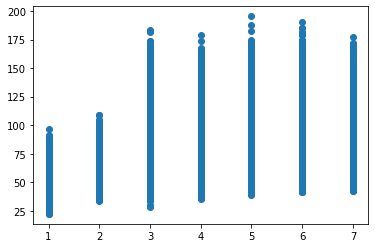

[-1 -1 -1 ... -1 -1 -1]


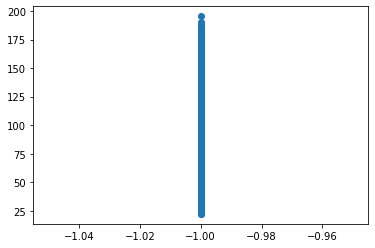

[1 1 1 ... 3 3 3]


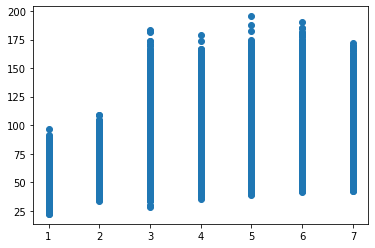

[-1 -1 -1 ... -1 -1 -1]


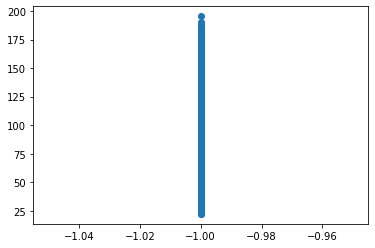

[1 1 1 ... 3 3 3]


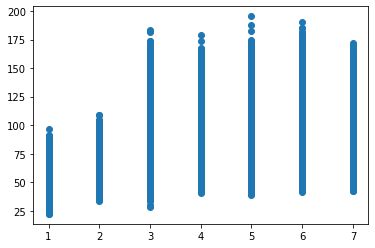

[2 2 2 ... 4 4 4]


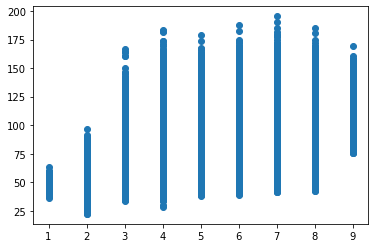

[1 1 1 ... 4 4 4]


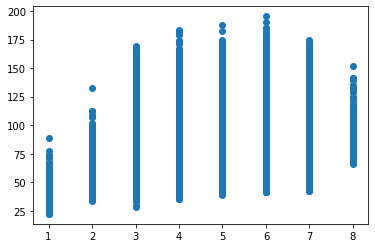

[2 2 2 ... 4 4 4]


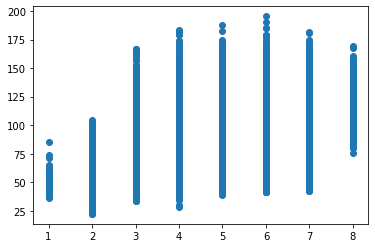

[1 1 1 ... 4 4 4]


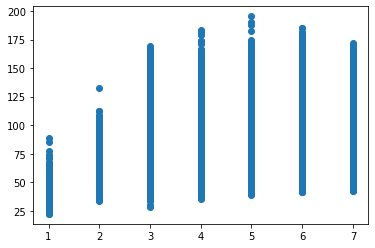

[2 2 2 ... 3 3 3]


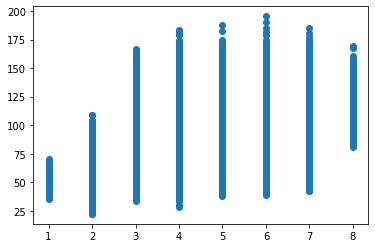

[1 1 1 ... 3 3 3]


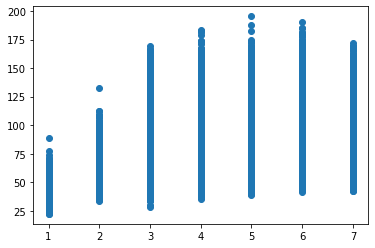

[2 2 2 ... 3 3 3]


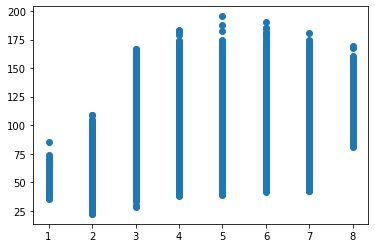

[1 1 1 ... 3 3 3]


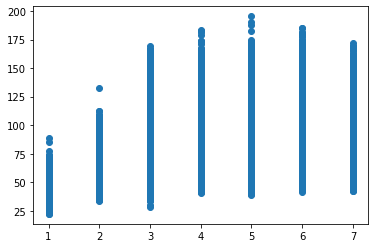

[1 1 1 ... 4 4 4]


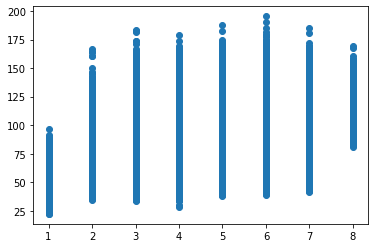

[1 1 1 ... 4 4 4]


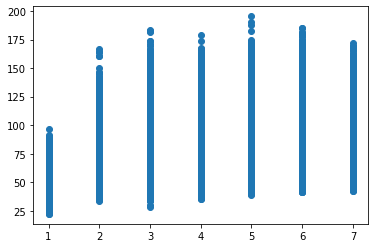

[-1 -1 -1 ... -1 -1 -1]


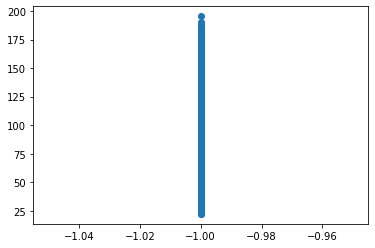

[1 1 1 ... 4 4 4]


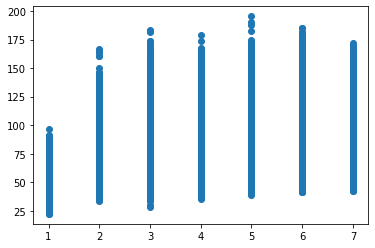

[1 1 1 ... 3 3 3]


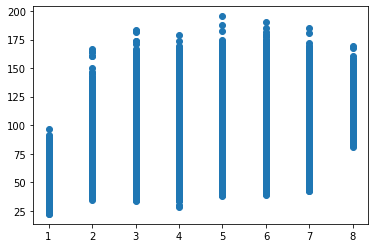

[1 1 1 ... 3 3 3]


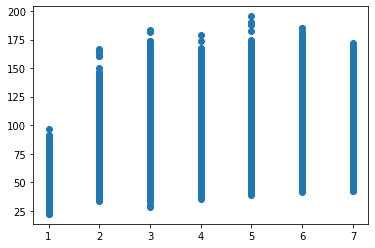

[1 1 1 ... 3 3 3]


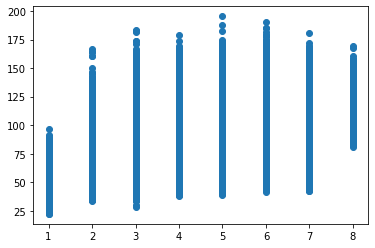

[1 1 1 ... 3 3 3]


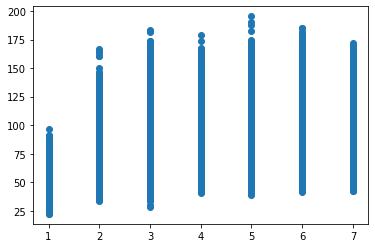

[2 2 2 ... 4 4 4]


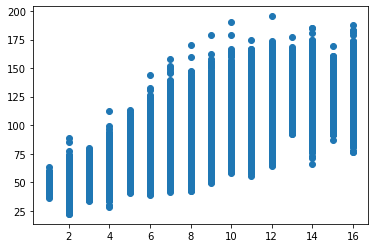

[1 1 1 ... 4 4 4]


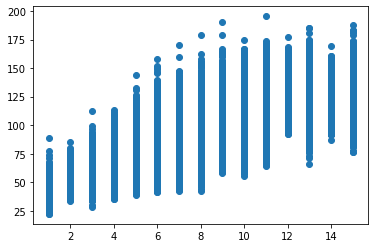

[2 2 2 ... 4 4 4]


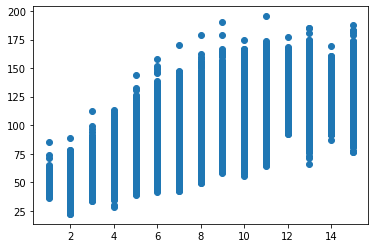

[1 1 1 ... 4 4 4]


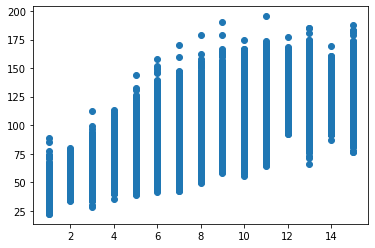

[2 2 2 ... 3 3 3]


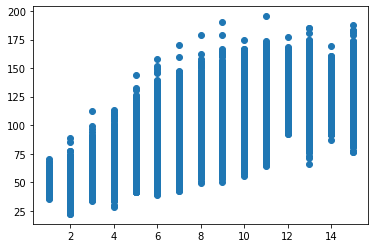

[1 1 1 ... 3 3 3]


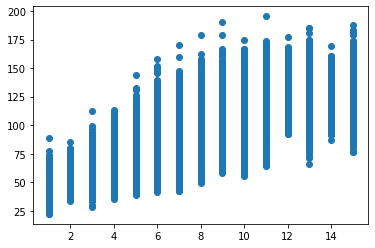

[2 2 2 ... 3 3 3]


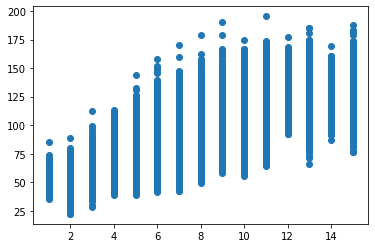

[1 1 1 ... 3 3 3]


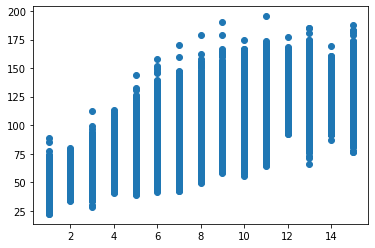

[1 1 1 ... 4 4 4]


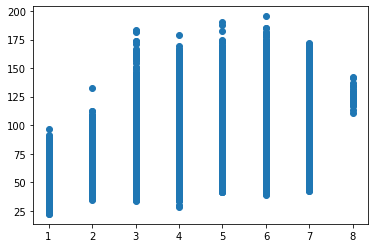

[1 1 1 ... 4 4 4]


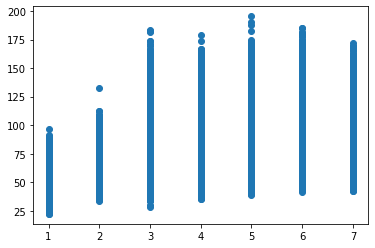

[1 1 1 ... 4 4 4]


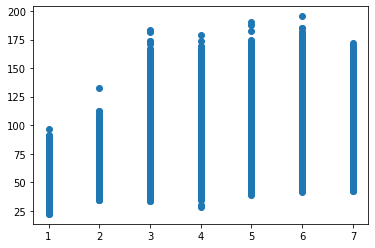

[1 1 1 ... 4 4 4]


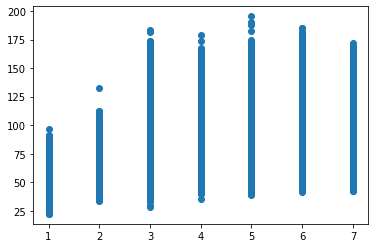

[1 1 1 ... 3 3 3]


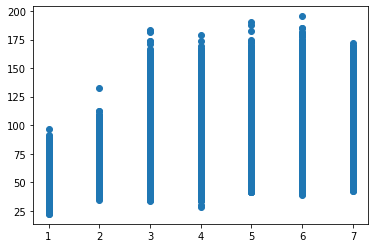

[1 1 1 ... 3 3 3]


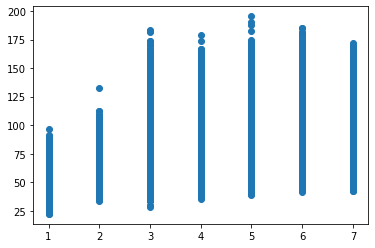

[1 1 1 ... 3 3 3]


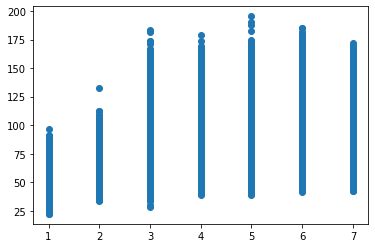

[1 1 1 ... 3 3 3]


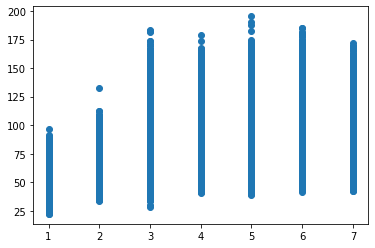

[2 2 2 ... 4 4 4]


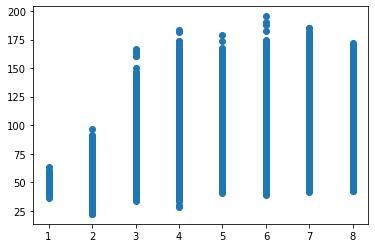

[1 1 1 ... 4 4 4]


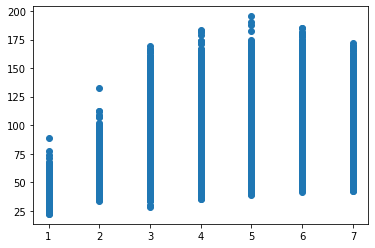

[2 2 2 ... 4 4 4]


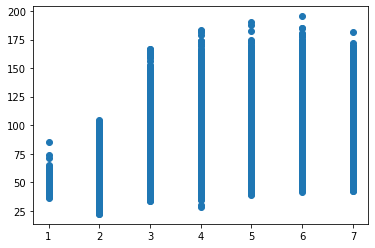

[1 1 1 ... 4 4 4]


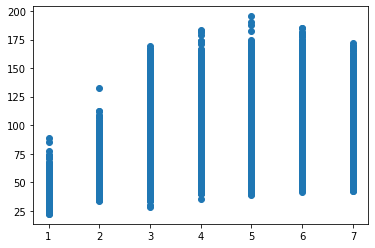

[2 2 2 ... 3 3 3]


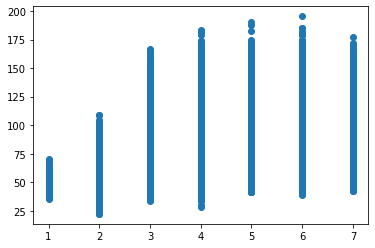

[1 1 1 ... 3 3 3]


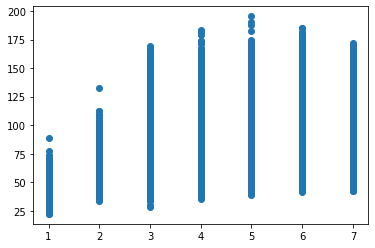

[2 2 2 ... 3 3 3]


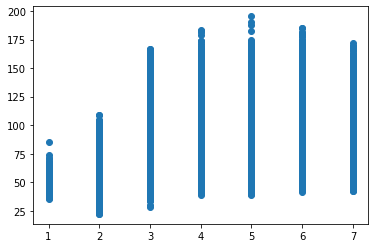

[1 1 1 ... 3 3 3]


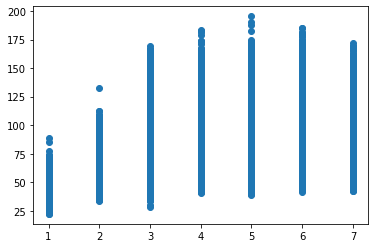

[1 1 1 ... 4 4 4]


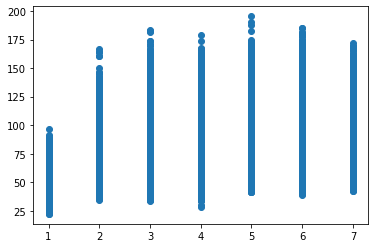

[1 1 1 ... 4 4 4]


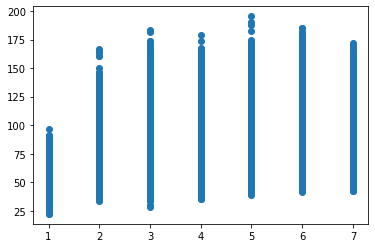

[1 1 1 ... 4 4 4]


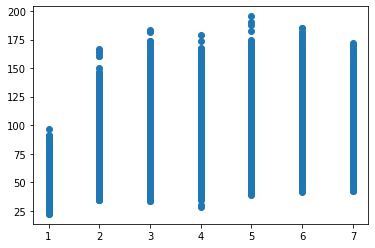

[1 1 1 ... 4 4 4]


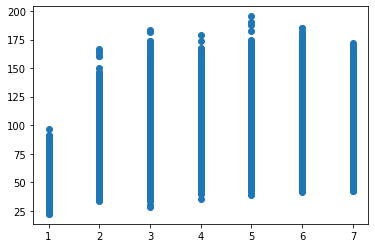

[1 1 1 ... 3 3 3]


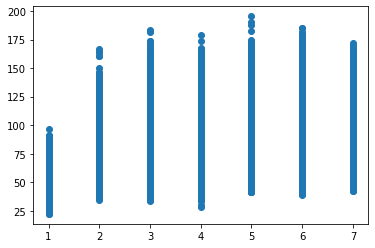

[1 1 1 ... 3 3 3]


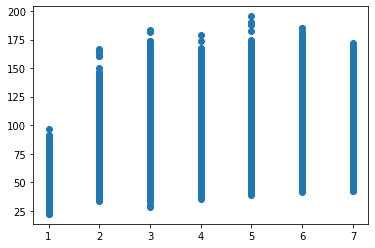

[1 1 1 ... 3 3 3]


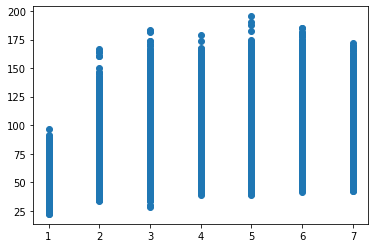

[1 1 1 ... 3 3 3]


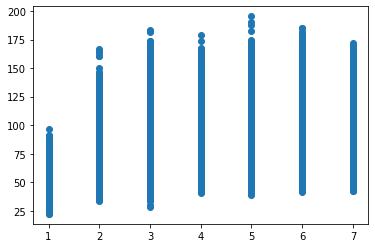

In [147]:
for subL in L:
    xs = subL[category_i.astype(int)]
    print(xs)
    plt.scatter(
        xs,
        cost_i
    )
    plt.show()

In [2]:
with open('fit_model.pkl', 'rb') as openfile:
    fit_data = pickle.load(openfile)

In [4]:
model = fit_data['model']
fit = fit_data['fit']

In [5]:
samples = fit.sample(1000)

In [8]:
a0_trace, a1_trace, sigma_trace = samples['a_0'], samples['a_1'], samples['sigma']

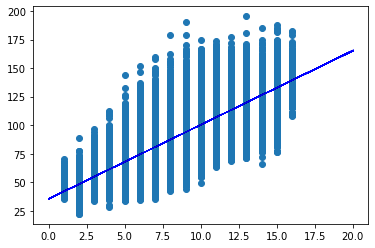

In [106]:
xs_lot = L[100,category_i.astype(int)]
plt.scatter(
    xs_lot,
    cost_i
)

xs = np.linspace(0,20,2)
for a0,a1,s in zip(a0_trace, a1_trace, sigma_trace):
    plt.plot(
        xs,
        a0+a1*xs,
        color='blue',
        alpha=0.05,
        linewidth=1
    )

plt.show()

<AxesSubplot:ylabel='Density'>

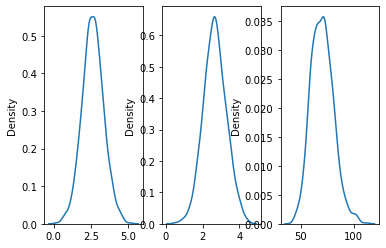

In [21]:
fig, axes = plt.subplots(1,3)
sns.kdeplot(a0_trace,ax=axes[0])
sns.kdeplot(a1_trace,ax=axes[1])
sns.kdeplot(sigma_trace,ax=axes[2])

In [12]:
L_extended = np.concatenate((L,np.fliplr(L)))
LoT_lengths = L_extended[100]

In [23]:
np.argwhere(np.all(L_extended!=-1,axis=1)).flatten().shape

(838,)

In [26]:
print(bool(0))

False
